
# Investigating  TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Depending on these variables we will try to ask question trying to find the relation between these variables and the attendance of patients for their appointments. we may use these variables to produce more detailed data to help in our investigation.

>
>
>To Can investigate our data we need firstly to:
>
>Wrangle our Data, by cleaning our data and removing any dublicated or any data may be misleading in our investigation then assessing the cleaned data to be finally ready to deal with the data 
>
>The investigation aim to explore The dataset trying to find correlations between the varied data. The investigation will start with some questions and queries trying to find answers for them.

### Questions to explore the Factors affecting the attendance:

>Q1: Top 10?

* Top 10 most common actors in movies
* Top 10 most common Directors
* Top 10 most common Production Companies
* Top common Genres 
* No. of movies released in each year
* No. of movies released in each month

>
>Q2: Which are the Most Popular Movies?
>
* Actors of the most popular movies
* Production Companies of the most popular movies
* Years of the most popular movies
* Genres of the most popular movies
* Months of the most popular movies


>Q3: Which are the Movies of the highest revenues?
>
* directors of the Movies of the highest revenues
* years of the Movies of the highest revenues
* Months of the Movies of the highest revenues 
* Genres of the Movies of the highest revenues
* Production Companies of the Movies of the highest revenues
* Actors of the Movies of the highest revenues


>Q4: Which are the Movies of the highest Profit?
>
* Actors of the Movies of the highest Profit
* Production Companies of the Movies of the highest Profit
* Genres of the Movies of the highest Profit
* Directors of the Movies of the highest Profit
* Years of the Movies of the highest Profit
* Months of the Movies of the highest Profit
 
>Q5: Which are the movies of the highest Voting?
>
* Production Companies of the movies of the highest Voting
* Genres of the movies of the highest Voting
* Actors of the movies of the highest Voting
* Directors of the movies of the highest Voting
* Years of the movies of the highest Voting
* months of the movies of the highest Voting

>Q6: Which are the movies of the biggest budget?
>
>Q7: How have the movies changed over years?
>
>Q8: How to make the BIGGEST profit ??
>
>Q9: How to make the most popularity?
>
>
>Along the way of our investigation we will try to keep it clear, we will try to keep ambiguity away by providing guiding notes and explantion for variables or any steps we will take.
>

The Dataset contains the following Variables:-

* imdb_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* budget - The budget in which the movie was made.
* director - name of the director of the movie.
* genres - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* release_date - The date on which it was released.
* release_year - The Year in which it was released.
* budget_adj - The budget of the associated movie in terms of 2010 dollars, accounting for inflation over time. 
* revenue_adj - The revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* tagline - Movie's tagline.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#importing the needed packages.

<a id='wrangling'></a>
## Data Wrangling

>check for cleanliness, and then trim and clean your dataset for analysis
### General Properties

In [2]:
df= pd.read_csv("tmdb-movies.csv")

#loading the dataset

In [3]:
df.info()     

# check for some information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

it seems that we need to change the type of some columns

In [4]:
df.shape

#check no. of columns and rows

(10866, 21)

In [5]:
df.head()

#an overview on the data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


we can drop some of the columns as we may not be in need for them in the investigation

In [6]:
df.duplicated().sum()  

#check for duplicates

1

it's found that there is a duplicated row

In [7]:
df.isnull().sum()

#check for any missing data

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.isnull().sum().sum()

#count the total no. of the missing data

13434

by checking for any missing data it's found that there are 13434 missing value we need to deal with 

In [9]:
df.describe()

#get a quick overview about the numbers

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


the previous section was a check for our data trying to detect any missing data or any point may need to be adjusted, and taking an overview on the data we are going to deal with.

### Data Cleaning 
###### (inserting columns, drop others, and may readjust the type of them in order to make the data in a proper status to start the investigation)

In [10]:
df['profit']= df.revenue_adj - df.budget_adj
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


inserting a new column "profit" which is the difference between the revenue_adj and the budget_adj

In [11]:
money=['budget_adj', "budget", 'revenue', "revenue_adj"]
df[money] = df[money].astype('int64') 
df.release_date= pd.to_datetime(df.release_date)
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                       int64
revenue_adj                      int64
profit                         float64
dtype: object

readjust the type of columns( budget_adj, revenue_adj, revenue, budget) to be integers, and also change the type of release_date to be in a date form

In [12]:
df["release_month"]= df['release_date'].apply(lambda x: x.month)

insert a new column "release_month" for the month at which the movie has been released

In [13]:
genres=df.genres.str.split("|", expand=True)
genres.head(0)

,0,1,2,3,4


In [14]:
genres.rename(columns={0:'genre1', 1:'genre2', 2:"genre3", 3:'genre4', 4:"genre5" }, inplace=True)
genres.head(0)

,genre1,genre2,genre3,genre4,genre5


In [15]:
df=pd.merge(df, genres, left_index=True, right_index=True, how="inner")
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit', 'release_month', 'genre1', 'genre2', 'genre3',
       'genre4', 'genre5'],
      dtype='object')

we split the "genres" column into 5 columns and then merged them in the main table after dropping "genres" column

In [16]:
cast=df.cast.str.split("|", expand=True)
cast.head(0)

,0,1,2,3,4


In [17]:
cast.rename(columns={0:'cast1', 1:'cast2', 2:"cast3", 3:'cast4', 4:"cast5" }, inplace=True)
cast.head(0)

,cast1,cast2,cast3,cast4,cast5


In [18]:
df=pd.merge(df, cast, left_index=True, right_index=True, how="inner")
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit', 'release_month', 'genre1', 'genre2', 'genre3',
       'genre4', 'genre5', 'cast1', 'cast2', 'cast3', 'cast4', 'cast5'],
      dtype='object')

we split the "cast" column into 5 columns and then merged them in the main table after dropping "cast" column

In [19]:
production=df.production_companies.str.split("|", expand=True)
production.head(0)

,0,1,2,3,4


In [20]:
production.rename(columns={0:'production1', 1:'production2', 2:"production3", 3:'production4', 4:"production5" }, inplace=True)
production.head(0)

,production1,production2,production3,production4,production5


In [21]:
df=pd.merge(df, production, left_index=True, right_index=True, how="inner")
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit', 'release_month', 'genre1', 'genre2', 'genre3',
       'genre4', 'genre5', 'cast1', 'cast2', 'cast3', 'cast4', 'cast5',
       'production1', 'production2', 'production3', 'production4',
       'production5'],
      dtype='object')

we split the "production_companies" column into 5 columns and then merged them in the main table after dropping "production_companies" column

In [22]:
x=['budget_adj', "budget", 'revenue', "revenue_adj", "runtime"]
df[x] = df[x].replace(0, np.NAN)

we replaced the illogical zero values by NAN to be deal with them to not mislead the investigation.

In [23]:
df.budget.fillna(df.budget.mean(), inplace=True)
df.budget_adj.fillna(df.budget_adj.mean(), inplace=True)
df.revenue_adj.fillna(df.revenue_adj.mean(), inplace=True)
df.revenue.fillna(df.revenue.mean(), inplace=True)
df.runtime.fillna(df.runtime.mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  float64       
 4   revenue               10866 non-null  float64       
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  float64       
 13  genres          

replacing the NAN values by the mean of it's column

In [24]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

dropping duplicates

In [25]:
df.drop(["imdb_id", "homepage", "tagline", "overview",'genres',"production_companies", 'cast'], axis=1,  inplace= True)


In [26]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'keywords', 'runtime', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'profit', 'release_month',
       'genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'cast1', 'cast2',
       'cast3', 'cast4', 'cast5', 'production1', 'production2', 'production3',
       'production4', 'production5'],
      dtype='object')

dropping columns ("imdb_id", "homepage", "tagline", "overview",'genres',"production_companies", 'cast') as we don't depend on them in the investigation

In [27]:
df.head()

,id,popularity,budget,revenue,original_title,director,keywords,runtime,release_date,vote_count,...,cast1,cast2,cast3,cast4,cast5,production1,production2,production3,production4,production5
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,2015-06-09,5562,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,2015-05-13,6185,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,2015-03-18,2480,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,2015-12-15,5292,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,car race|speed|revenge|suspense|car,137.0,2015-04-01,2947,...,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [28]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04,10865.000000
mean,66066.374413,0.646446,3.073950e+07,8.922878e+07,102.363852,217.399632,5.975012,2001.321859,3.690265e+07,1.150879e+08,3.381911e+07,6.827612
std,92134.091971,1.000231,2.683275e+07,1.082720e+08,30.904039,575.644627,0.935138,12.813260,2.893655e+07,1.328386e+08,1.252194e+08,3.441764
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,1.000000e+00,2.000000e+00,-4.139124e+08,1.000000
25%,10596.000000,0.207575,1.925000e+07,4.109806e+07,90.000000,17.000000,5.400000,1995.000000,2.462579e+07,5.878518e+07,0.000000e+00,4.000000
50%,20662.000000,0.383831,3.073943e+07,8.922066e+07,99.000000,38.000000,6.000000,2006.000000,3.690201e+07,1.150774e+08,0.000000e+00,7.000000
75%,75612.000000,0.713857,3.073943e+07,8.922066e+07,111.000000,146.000000,6.600000,2011.000000,3.690201e+07,1.150774e+08,1.293091e+07,10.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09,12.000000


*in the previous section*
* we dropped duplicates
* we dropped some columns we don't need in the investigation
* we inserted some columns that we need in the investigation
* we have dealed with the missing values


<a id='eda'></a>
## Exploratory Data Analysis



### Q1: Top 10

#### How many Movies are Released?

In [29]:
df.original_title.count()

10865

#### 1.1. Top 10 most common actors in movies

In [30]:
df_cast=df[["cast1","cast2","cast3","cast4","cast5"]]

In [31]:
df_cast_melt= df_cast.melt()

In [32]:
acted= pd.crosstab(index=df_cast_melt["value"], columns=df_cast_melt["variable"])
acted

variable,cast1,cast2,cast3,cast4,cast5
value,,,,,
Larry Mullen Jr.,0,0,1,1,0
Nicole MuÃ±oz,0,0,0,0,1
Therese Giehse,0,1,0,0,0
"""Weird Al"" Yankovic",1,0,0,0,0
50 Cent,6,1,2,0,3
...,...,...,...,...,...
Äá»— Thá»‹ Háº£i Yáº¿n,0,0,1,0,0
Å arÅ«nas Bartas,0,0,0,1,0
Åžafak Sezer,0,0,0,0,1


In [33]:
acted["total"]= acted.cast1+acted.cast2+acted.cast3+acted.cast4+acted.cast5
acted= acted.sort_values(ascending=False, by=["total"]).head(10)
acted

variable,cast1,cast2,cast3,cast4,cast5,total
value,,,,,,
Robert De Niro,42,13,10,5,2,72
Samuel L. Jackson,29,14,11,10,7,71
Bruce Willis,39,10,5,6,2,62
Nicolas Cage,50,6,2,2,1,61
Michael Caine,21,17,6,6,3,53
Robin Williams,33,7,4,4,3,51
John Cusack,30,11,5,4,0,50
Morgan Freeman,18,17,7,5,2,49
John Goodman,11,14,10,7,7,49


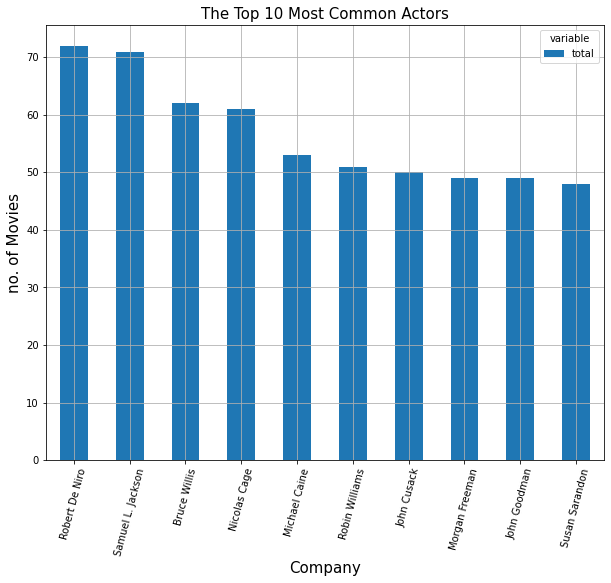

In [34]:
acted_total= acted[["total"]]

acted_total.plot(kind="bar", figsize=(10,8), grid=True)
plt.title("The Top 10 Most Common Actors",fontsize=15)
plt.xlabel("Company", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

here we can see the top 10 actors according to no. of their movies,
> **Robert De Niro** comes first with 72 movies
>
> **Samuel L. Jackson** comes second with 71 movies

#### 1.2. Top 10 most common Directors

In [35]:
most_directors= df.director.value_counts()
most_directors= most_directors.sort_values(ascending= False).head(10)
most_directors

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: director, dtype: int64

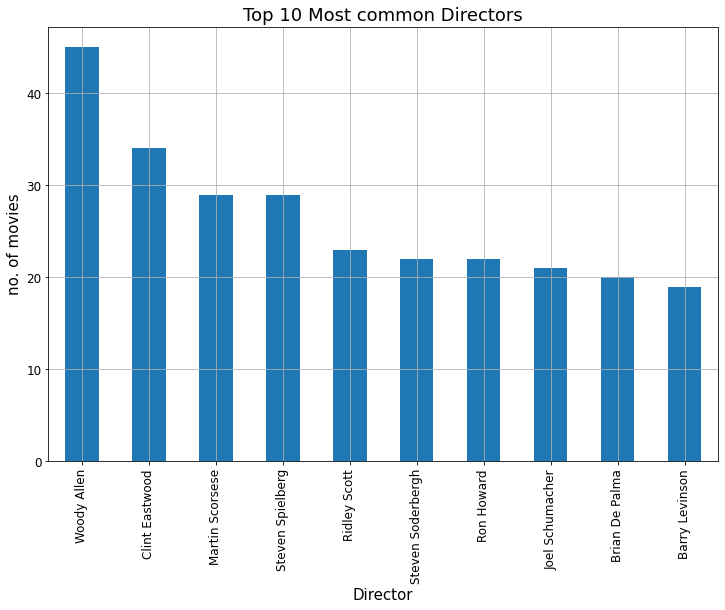

In [36]:
most_directors.plot(kind="bar",  figsize=(12,8), fontsize=12, grid=True);
plt.xlabel("Director", fontsize=15);
plt.ylabel("no. of movies", fontsize=15);
plt.title("Top 10 Most common Directors", fontsize=18);


for the directors of the most movies,
> **Woody Allen** comes first with 45 movies.
>
> **Clint Eastwood** comes second with 34 movies.

#### 1.3. Top 10 most common Production Companies

In [37]:
df_prd=df[["production1","production2","production3","production4","production5"]]

In [38]:
df_prd_melt= df_prd.melt()

In [39]:
produced=pd.crosstab(index=df_prd_melt["value"], columns=df_prd_melt["variable"])
produced

variable,production1,production2,production3,production4,production5
value,,,,,
"""DIA"" Productions GmbH & Co. KG",0,0,0,1,0
# Lexyn Productions,0,1,0,0,0
10 West Studios,0,0,0,1,0
100 Feet Productions,0,1,0,0,0
1019 Entertainment,0,0,0,1,0
...,...,...,...,...,...
uFilm,3,1,3,3,1
uFund,0,0,0,0,1
verture Films,0,1,0,0,0


In [40]:
produced["total"]= produced.production1+produced.production2+produced.production3+produced.production4+produced.production5
produced= produced.sort_values(ascending=False, by=["total"]).head(10)
produced

variable,production1,production2,production3,production4,production5,total
value,,,,,,
Universal Pictures,460,57,5,0,0,522
Warner Bros.,172,169,93,55,20,509
Paramount Pictures,426,5,0,0,0,431
Twentieth Century Fox Film Corporation,242,31,8,1,0,282
Columbia Pictures,271,1,0,0,0,272
New Line Cinema,206,13,0,0,0,219
Metro-Goldwyn-Mayer (MGM),104,66,29,10,9,218
Walt Disney Pictures,214,0,0,0,0,214
Touchstone Pictures,72,64,27,10,5,178


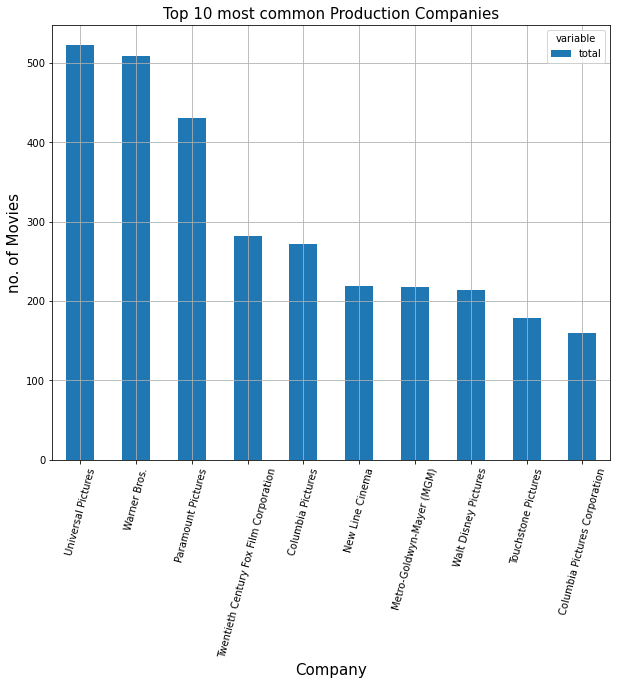

In [41]:
produced_total= produced[["total"]]

produced_total.plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Top 10 most common Production Companies",fontsize=15)
plt.xlabel("Company", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

the most common production company is
>**Universal Pictures** for 522 movies.
>
> **Warner Bros.** comes second with 509 movies.

#### 1.4. Top common Genres 

In [42]:
df_gen=df[["genre1","genre2","genre3","genre4","genre5"]]

In [43]:
df_gen_melt= df_gen.melt()

In [44]:
genres=pd.crosstab(index=df_gen_melt["value"], columns=df_gen_melt["variable"])
genres

variable,genre1,genre2,genre3,genre4,genre5
value,,,,,
Action,1590,544,198,42,10
Adventure,586,626,183,62,14
Animation,403,207,80,6,3
Comedy,2319,990,388,81,15
Crime,380,449,350,152,23
Documentary,432,77,8,3,0
Drama,2453,1618,546,124,19
Family,144,448,401,178,60
Fantasy,272,304,190,109,41


In [45]:
genres["total"]=genres.genre1+genres.genre2+genres.genre3+genres.genre4+genres.genre5
genres= genres.sort_values(ascending=False, by=["total"])
genres

variable,genre1,genre2,genre3,genre4,genre5,total
value,,,,,,
Drama,2453,1618,546,124,19,4760
Comedy,2319,990,388,81,15,3793
Thriller,491,961,886,449,120,2907
Action,1590,544,198,42,10,2384
Romance,186,704,583,194,45,1712
Horror,915,489,186,36,11,1637
Adventure,586,626,183,62,14,1471
Crime,380,449,350,152,23,1354
Family,144,448,401,178,60,1231


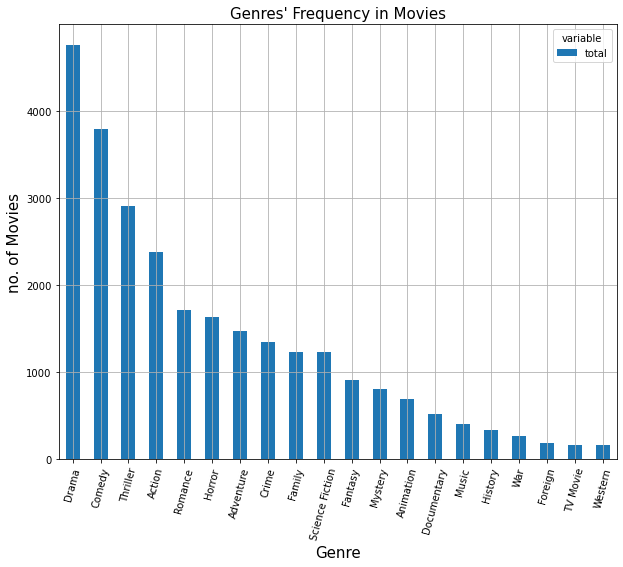

In [46]:
genres_total= genres[["total"]]

genres_total.plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Genres' Frequency in Movies",fontsize=15)
plt.xlabel("Genre", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

the most common Genre in movies 
>**Drama** comes first with 4760 movies.
>
>**Comedy** comes second with 3793 movies.

is that the most popular genre, or even the most profitable? that's what we gonna see later in the investigation.

In [47]:
sum_gen= genres.total.sum()
genres_percent=genres.total/sum_gen
genres_percent

value
Drama              0.176591
Comedy             0.140716
Thriller           0.107846
Action             0.088444
Romance            0.063513
Horror             0.060731
Adventure          0.054572
Crime              0.050232
Family             0.045669
Science Fiction    0.045595
Fantasy            0.033983
Mystery            0.030050
Animation          0.025932
Documentary        0.019291
Music              0.015136
History            0.012391
War                0.010017
Foreign            0.006975
TV Movie           0.006196
Western            0.006121
Name: total, dtype: float64

In [48]:
genres_percentages= genres_percent.iloc[:10]
others_percentages= genres_percent.iloc[10:]
others=others_percentages.sum()
genres_percentages["others"]=others
others

0.16609163420515677

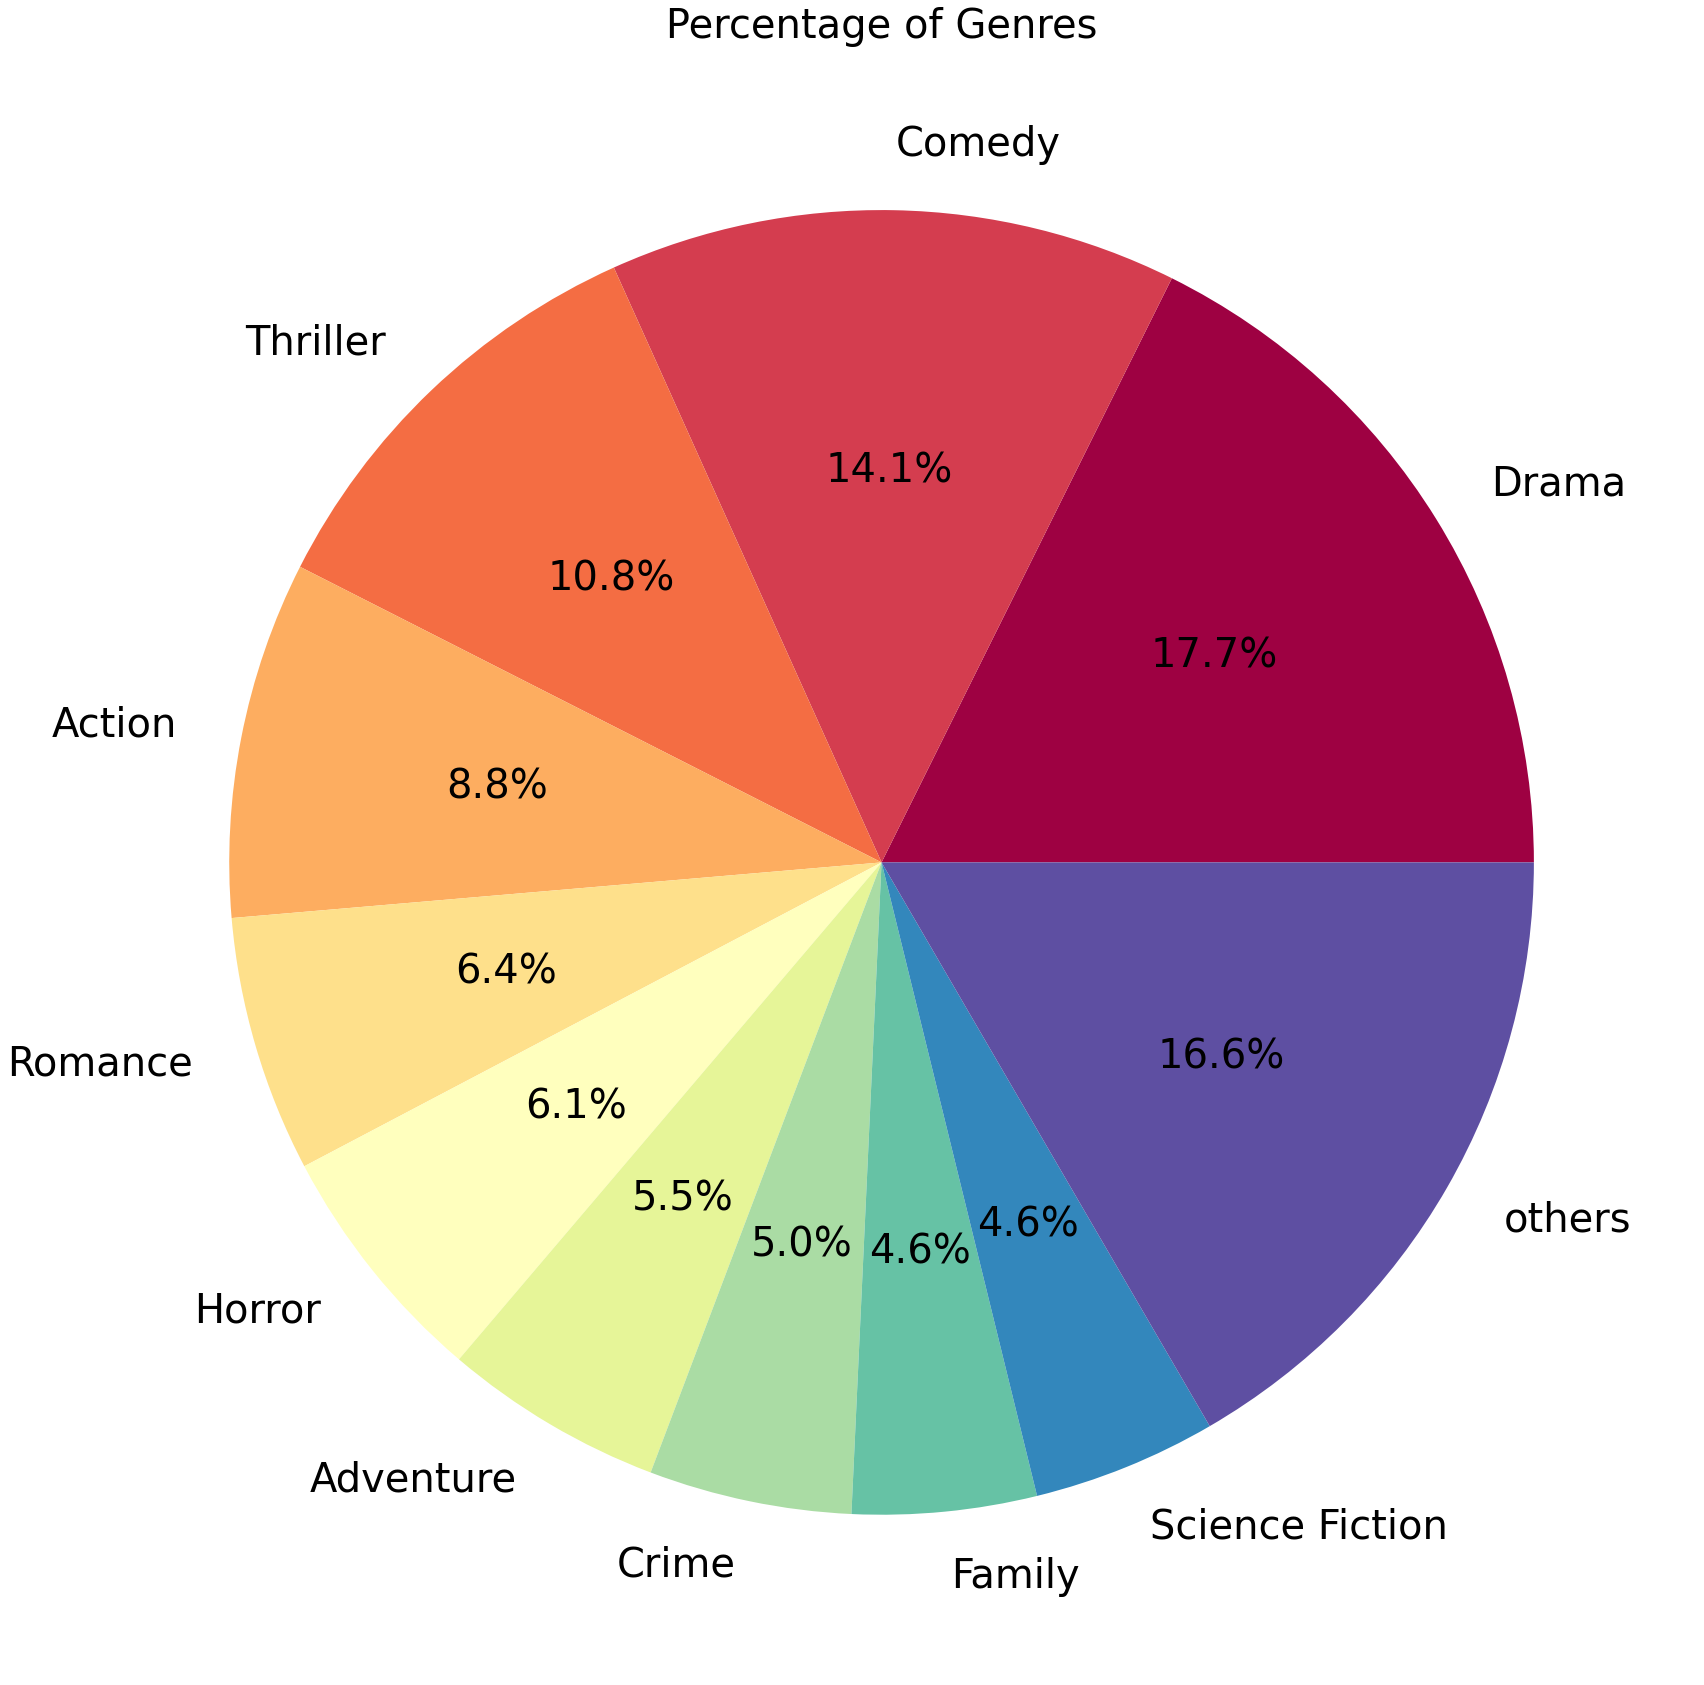

In [49]:
genres_percentages.plot(kind="pie",radius=1, figsize=(30,30),startangle=0, fontsize=40, autopct='%1.1f%%',cmap = 'Spectral')
plt.title('Percentage of Genres', fontsize = 40, loc="Center")
plt.ylabel(" ");

here we can see the portion of each genre in the released movies

#### 1.5. No. of movies released in each year

In [50]:
year_movie = df.groupby('release_year')['original_title'].count()
year_movie.sort_values(ascending=False).head(10)

release_year
2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
Name: original_title, dtype: int64

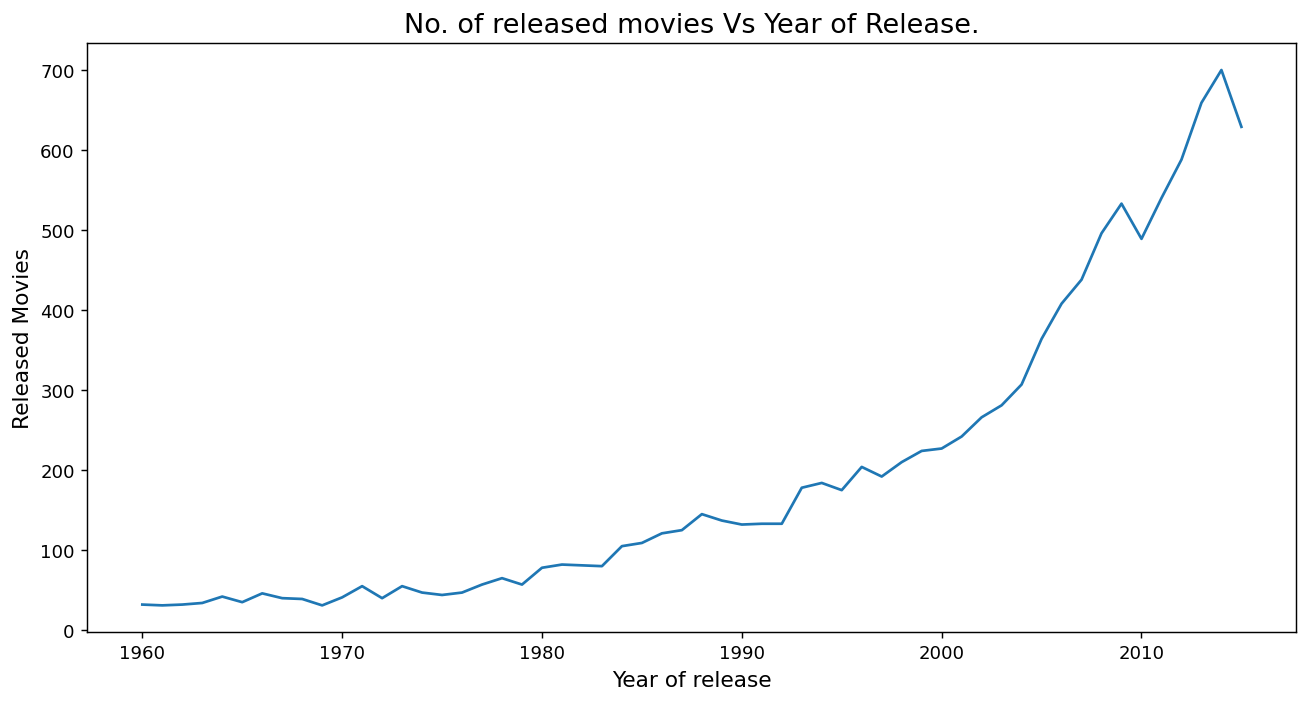

In [51]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Year of release', fontsize = 12)

plt.ylabel('Released Movies', fontsize = 12)

plt.title('No. of released movies Vs Year of Release.', fontsize=15)


plt.plot(year_movie)


plt.show()

here we can see how the production of the industry has been increasing 
> 2014 was on top with 700 movies

#### 1.6. No. of movies released in each month

In [52]:
month_movies=  df.groupby('release_month')['original_title'].count()
month_movies

release_month
1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: original_title, dtype: int64

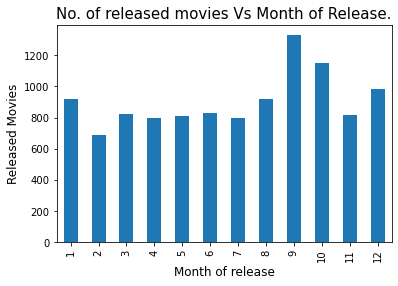

In [53]:
month_movies.plot(kind="bar")
plt.xlabel('Month of release', fontsize = 12)
plt.ylabel('Released Movies', fontsize = 12)
plt.title('No. of released movies Vs Month of Release.', fontsize=15)
plt.show()

here we can notice that **september** has the highest number of movies 

### Q2: Which are the Most Popular Movies?

In [54]:
pop=df.sort_values(ascending= False, by=["popularity"]).head(10)
pop

,id,popularity,budget,revenue,original_title,director,keywords,runtime,release_date,vote_count,...,cast1,cast2,cast3,cast4,cast5,production1,production2,production3,production4,production5
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,2015-06-09,5562,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,2015-05-13,6185,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
629,157336,24.949134,165000000.0,6.217525e+08,Interstellar,Christopher Nolan,saving the world|artificial intelligence|fathe...,169.0,2014-11-05,6498,...,Matthew McConaughey,Jessica Chastain,Anne Hathaway,Michael Caine,Casey Affleck,Paramount Pictures,Legendary Pictures,Warner Bros.,Syncopy,Lynda Obst Productions
630,118340,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,James Gunn,marvel comic|spaceship|space|scene during end ...,121.0,2014-07-30,5612,...,Chris Pratt,Zoe Saldana,Dave Bautista,Vin Diesel,Bradley Cooper,Marvel Studios,Moving Picture Company (MPC),Bulletproof Cupid,Revolution Sun Studios,None
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,2015-03-18,2480,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
631,100402,12.971027,170000000.0,7.147666e+08,Captain America: The Winter Soldier,Joe Russo|Anthony Russo,washington d.c.|future|shield|marvel comic|comic,136.0,2014-03-20,3848,...,Chris Evans,Scarlett Johansson,Sebastian Stan,Samuel L. Jackson,Robert Redford,Marvel Studios,None,None,None,None
1329,11,12.037933,11000000.0,7.753980e+08,Star Wars,George Lucas,android|galaxy|hermit|death star|lightsaber,121.0,1977-03-20,4428,...,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness,Lucasfilm,Twentieth Century Fox Film Corporation,None,None,None
632,245891,11.422751,20000000.0,7.873990e+07,John Wick,Chad Stahelski|David Leitch,hitman|revenge|murder|gangster|dog,101.0,2014-10-22,2712,...,Keanu Reeves,Michael Nyqvist,Alfie Allen,Willem Dafoe,Dean Winters,Thunder Road Pictures,Warner Bros.,87Eleven,DefyNite Films,MJW Films
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,2015-12-15,5292,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,None,None
633,131631,10.739009,125000000.0,7.521002e+08,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,resistance|post-apocalyptic|dystopia|war|sequel,123.0,2014-11-18,3590,...,Jennifer Lawrence,Josh Hutcherson,Liam Hemsworth,Woody Harrelson,Donald Sutherland,Lionsgate,Color Force,None,None,None


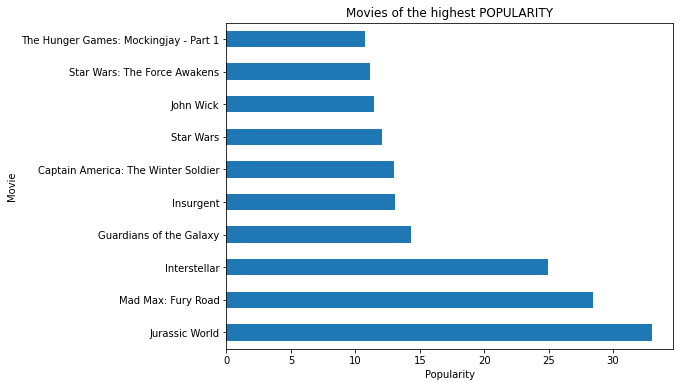

In [55]:
df.groupby("original_title")["popularity"].sum().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(8,6) , title='Movies of the highest POPULARITY');
plt.xlabel('Popularity')
plt.ylabel('Movie');

for popularity
> **Jurassic World** is the most popular movie
>
> **Mad Max: Fury Road** is the second most popular movie

#### 2.1. Actors of the most popular movies

In [56]:
pop_act= pop[['cast1','cast2','cast3','cast4','cast5']]

In [57]:
pop_act_melt= pop_act.melt()

In [58]:
cast_pop=pd.crosstab(index=pop_act_melt["value"], columns=pop_act_melt["variable"])
cast_pop

variable,cast1,cast2,cast3,cast4,cast5
value,,,,,
Adam Driver,0,0,0,1,0
Alec Guinness,0,0,0,0,1
Alfie Allen,0,0,1,0,0
Anne Hathaway,0,0,1,0,0
Ansel Elgort,0,0,0,1,0
Bradley Cooper,0,0,0,0,1
Bryce Dallas Howard,0,1,0,0,0
Carrie Fisher,0,0,2,0,0
Casey Affleck,0,0,0,0,1


In [59]:
cast_pop["total"]=cast_pop.cast1+cast_pop.cast2+cast_pop.cast3+cast_pop.cast4+cast_pop.cast5
cast_pop= cast_pop.sort_values(ascending=False, by=["total"])
cast_pop

variable,cast1,cast2,cast3,cast4,cast5,total
value,,,,,,
Mark Hamill,1,1,0,0,0,2
Carrie Fisher,0,0,2,0,0,2
Harrison Ford,1,1,0,0,0,2
Chris Pratt,2,0,0,0,0,2
Samuel L. Jackson,0,0,0,1,0,1
Matthew McConaughey,1,0,0,0,0,1
Michael Caine,0,0,0,1,0,1
Michael Nyqvist,0,1,0,0,0,1
Miles Teller,0,0,0,0,1,1


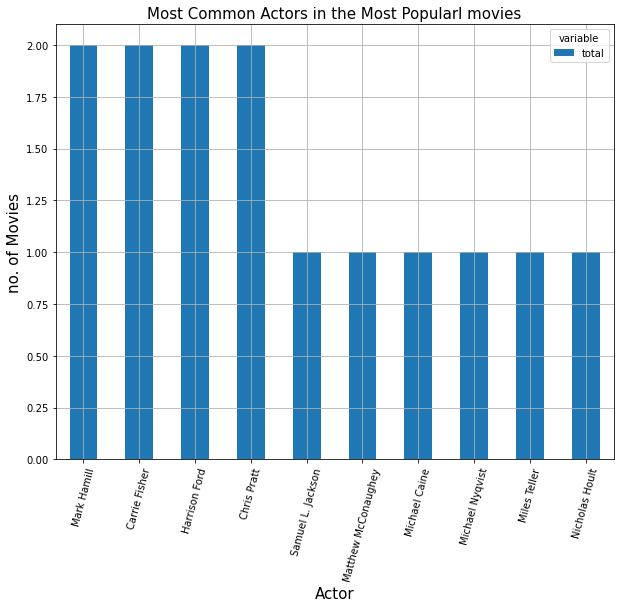

In [60]:
cast_pop_total= cast_pop[["total"]]

cast_pop_total.head(10).plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Most Common Actors in the Most Popularl movies",fontsize=15)
plt.xlabel("Actor", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

we can notice that **Mark Hamill** , **Carrie Fisher**, **Harrison Ford**, and **Chris Pratt**, each have contributed in 2 of the most popular movies.

In [61]:
pop["director"].value_counts()

Colin Trevorrow                1
George Miller                  1
Christopher Nolan              1
James Gunn                     1
Robert Schwentke               1
Joe Russo|Anthony Russo        1
George Lucas                   1
Chad Stahelski|David Leitch    1
J.J. Abrams                    1
Francis Lawrence               1
Name: director, dtype: int64

for directors, each one of the above has just directed one of the most popular movies

#### 2.2. production companies of the most popular movies

In [62]:
pop_prd= pop[['production1','production2','production3','production4','production5']]

In [63]:
pop_prd_melt= pop_prd.melt()

In [64]:
pop_comp= pd.crosstab(index=pop_prd_melt["value"], columns=pop_prd_melt['variable'])
pop_comp

variable,production1,production2,production3,production4,production5
value,,,,,
87Eleven,0,0,1,0,0
Amblin Entertainment,0,1,0,0,0
Bad Robot,0,0,1,0,0
Bulletproof Cupid,0,0,1,0,0
Color Force,0,1,0,0,0
DefyNite Films,0,0,0,1,0
Dentsu,0,0,0,0,1
Fuji Television Network,0,0,0,1,0
Kennedy Miller Productions,0,1,0,0,0


In [65]:
pop_comp["total"]=pop_comp.production1+pop_comp.production2+pop_comp.production3+pop_comp.production4+pop_comp.production5
pop_comp= pop_comp.sort_values(ascending=False, by=["total"])
pop_comp

variable,production1,production2,production3,production4,production5,total
value,,,,,,
Warner Bros.,0,1,1,0,0,2
Legendary Pictures,0,1,1,0,0,2
Lucasfilm,2,0,0,0,0,2
Marvel Studios,2,0,0,0,0,2
Moving Picture Company (MPC),0,1,0,0,0,1
Village Roadshow Pictures,1,0,0,0,0,1
Universal Studios,1,0,0,0,0,1
Twentieth Century Fox Film Corporation,0,1,0,0,0,1
Truenorth Productions,0,1,0,0,0,1


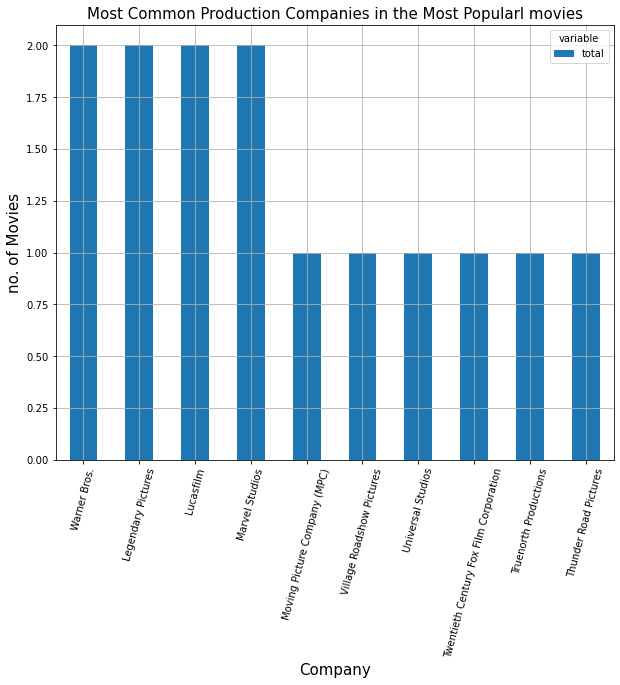

In [66]:
pop_comp_total= pop_comp[["total"]]

pop_comp_total.head(10).plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Most Common Production Companies in the Most Popularl movies",fontsize=15)
plt.xlabel("Company", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

bu for production companies
> each of **Warner Bros**, **Legendary Pictures**, **Lucasfilm**, and **Marvel Studios** have directed 2 of the most popular movies


#### 2.3. years of the most popular movies

In [67]:
pop_year= pop.release_year.value_counts()
pop_year

2014    5
2015    4
1977    1
Name: release_year, dtype: int64

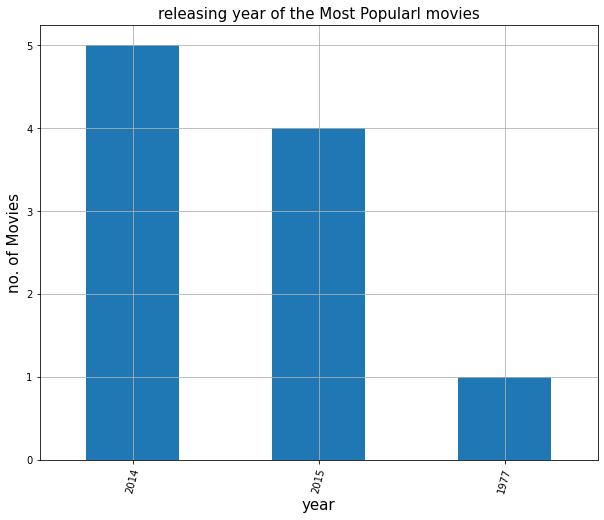

In [68]:
pop_year.plot(kind="bar", figsize=(10,8), grid=True)
plt.title("releasing year of the Most Popularl movies",fontsize=15)
plt.xlabel("year", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

in **2014**  five of the most popular movies were released, in the next year **2015** four of the most popular movies were released

#### 2.4. Genres of the most popular movies

In [69]:
pop_gen=pop[["genre1","genre2","genre3","genre4","genre5"]]

In [70]:
pop_gen_melt= pop_gen.melt()

In [71]:
pop_genre= pd.crosstab(index=pop_gen_melt["value"], columns=pop_gen_melt['variable'])
pop_genre

variable,genre1,genre2,genre3,genre4
value,,,,
Action,6,1,0,0
Adventure,3,5,1,0
Drama,0,1,0,0
Fantasy,0,0,0,1
Science Fiction,1,2,6,0
Thriller,0,1,2,2


In [72]:
pop_genre['total']= pop_genre.genre1 +pop_genre.genre2+pop_genre.genre3+pop_genre.genre4
pop_genre=pop_genre.sort_values(ascending=False, by=["total"])
pop_genre

variable,genre1,genre2,genre3,genre4,total
value,,,,,
Adventure,3,5,1,0,9
Science Fiction,1,2,6,0,9
Action,6,1,0,0,7
Thriller,0,1,2,2,5
Drama,0,1,0,0,1
Fantasy,0,0,0,1,1


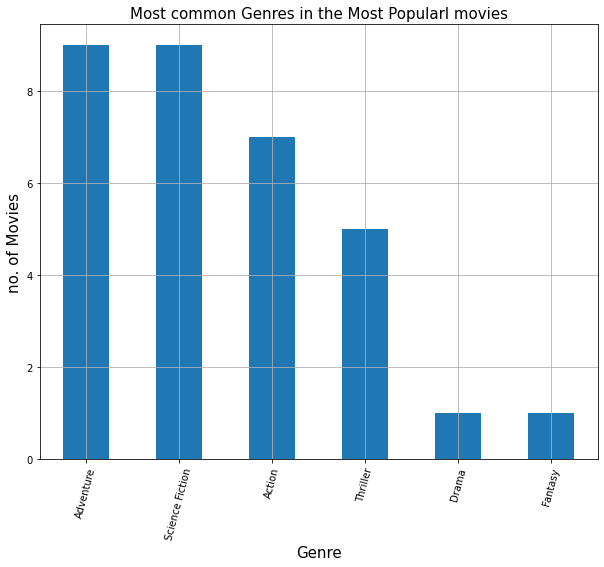

In [73]:
pop_genre.total.plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Most common Genres in the Most Popularl movies",fontsize=15)
plt.xlabel("Genre", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

in the most Popular Movies,  Genres **Adventure** and **Science Fiction** were both the  most common for 9 movies, **Action** were found in 7 Movies

#### 2.5. Months of the most popular movies

In [74]:
pop_month= pop.release_month.value_counts()
pop_month

3     3
11    2
6     1
5     1
7     1
10    1
12    1
Name: release_month, dtype: int64

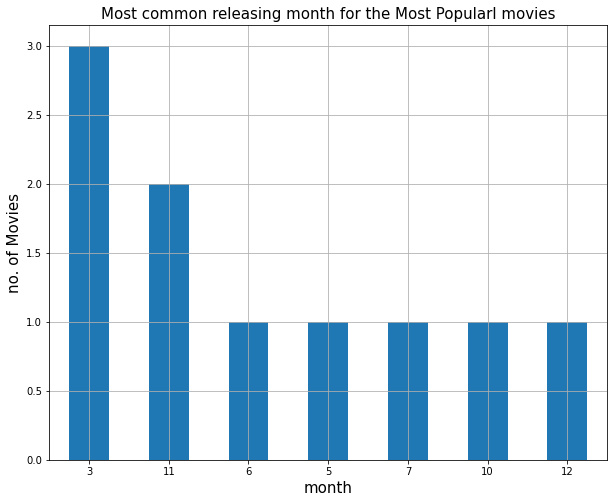

In [75]:
pop_month.plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Most common releasing month for the Most Popularl movies",fontsize=15)
plt.xlabel("month", fontsize=15)
plt.xticks(rotation = 0)
plt.ylabel("no. of Movies", fontsize=15);

**March** was the month in which 3 of the most popular movies were released.

### Q3: Which are the Movies of the highest revenues

In [76]:
rev=df.sort_values(ascending= False, by=["revenue_adj"]).head(10)
rev

,id,popularity,budget,revenue,original_title,director,keywords,runtime,release_date,vote_count,...,cast1,cast2,cast3,cast4,cast5,production1,production2,production3,production4,production5
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,James Cameron,culture clash|future|space war|space colony|so...,162.0,2009-12-10,8458,...,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,Michelle Rodriguez,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,Lightstorm Entertainment,None
1329,11,12.037933,11000000.0,7.753980e+08,Star Wars,George Lucas,android|galaxy|hermit|death star|lightsaber,121.0,1977-03-20,4428,...,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness,Lucasfilm,Twentieth Century Fox Film Corporation,None,None,None
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,James Cameron,shipwreck|iceberg|ship|panic|titanic,194.0,1997-11-18,4654,...,Kate Winslet,Leonardo DiCaprio,Frances Fisher,Billy Zane,Kathy Bates,Paramount Pictures,Twentieth Century Fox Film Corporation,Lightstorm Entertainment,None,None
10594,9552,2.010733,8000000.0,4.413061e+08,The Exorcist,William Friedkin,exorcism|holy water|religion and supernatural|...,122.0,1973-12-26,1113,...,Linda Blair,Max von Sydow,Ellen Burstyn,Jason Miller,Lee J. Cobb,Warner Bros.,Hoya Productions,None,None,None
9806,578,2.563191,7000000.0,4.706540e+08,Jaws,Steven Spielberg,fishing|atlantic ocean|bathing|shipwreck|polic...,124.0,1975-06-18,1415,...,Roy Scheider,Robert Shaw,Richard Dreyfuss,Lorraine Gary,Murray Hamilton,Universal Pictures,Zanuck/Brown Productions,None,None,None
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,2015-12-15,5292,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,None,None
8889,601,2.900556,10500000.0,7.929106e+08,E.T. the Extra-Terrestrial,Steven Spielberg,farewell|homesickness|nasa|extraterrestrial te...,115.0,1982-04-03,1830,...,Henry Thomas,Drew Barrymore,Robert MacNaughton,Dee Wallace,Peter Coyote,Universal Pictures,Amblin Entertainment,None,None,None
8094,1642,1.136610,22000000.0,1.106280e+09,The Net,Irwin Winkler,cheating|new identity|computer virus|chase|com...,114.0,1995-07-28,201,...,Sandra Bullock,Jeremy Northam,Dennis Miller,Wendy Gazelle,Ken Howard,Columbia Pictures,None,None,None,None
10110,12230,2.631987,4000000.0,2.158800e+08,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,puppy|animation|dog|dalmatian,79.0,2061-01-25,913,...,Rod Taylor,J. Pat O'Malley,Betty Lou Gerson,Martha Wentworth,Ben Wright,Walt Disney Productions,None,None,None,None
4361,24428,7.637767,220000000.0,1.519558e+09,The Avengers,Joss Whedon,new york|shield|marvel comic|comic|superhero,143.0,2012-04-25,8903,...,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth,Scarlett Johansson,Marvel Studios,None,None,None,None


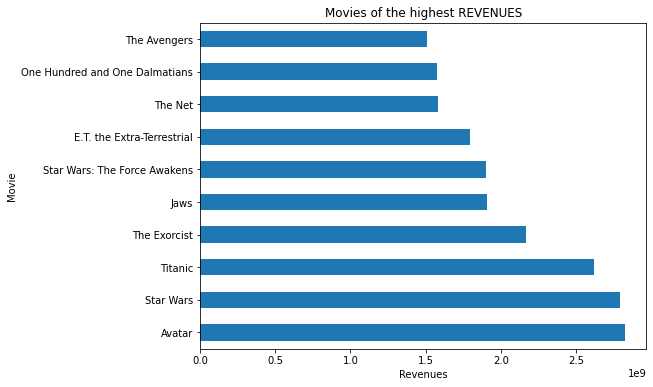

In [77]:
df.groupby("original_title")["revenue_adj"].sum().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(8,6) , title='Movies of the highest REVENUES');
plt.xlabel('Revenues')
plt.ylabel('Movie');

#### 3.1. directors of the Movies of the highest revenues

In [78]:
rev_direct=rev.director.value_counts()
rev_direct

James Cameron                                        2
Steven Spielberg                                     2
George Lucas                                         1
William Friedkin                                     1
J.J. Abrams                                          1
Irwin Winkler                                        1
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    1
Joss Whedon                                          1
Name: director, dtype: int64

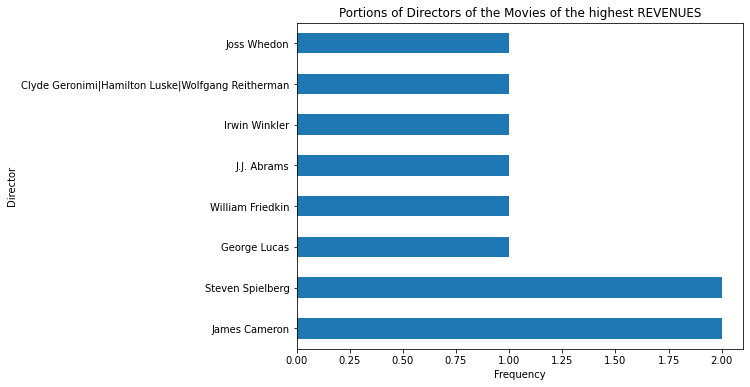

In [79]:
rev_direct.plot(kind='barh',figsize=(8,6) , title='Portions of Directors of the Movies of the highest REVENUES');
plt.xlabel('Frequency')
plt.ylabel('Director');

both **James Cameron** and **Steven Spielberg** each have directed 2 of the movies of the highest revenues. 

#### 3.2. years of the Movies of the highest revenues

In [80]:
rev_year=rev.release_year.value_counts()
rev_year

2009    1
1977    1
1997    1
1973    1
1975    1
2015    1
1982    1
1995    1
1961    1
2012    1
Name: release_year, dtype: int64

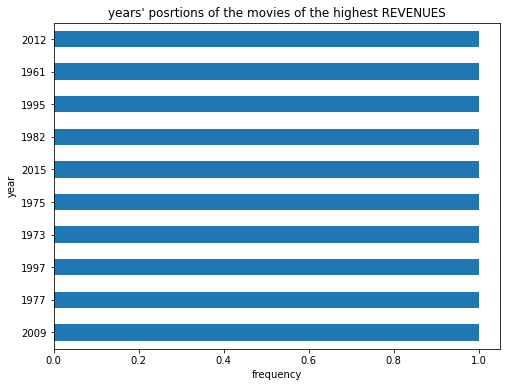

In [81]:
rev_year.plot(kind='barh',figsize=(8,6) , title="years' posrtions of the movies of the highest REVENUES");
plt.xlabel('frequency')
plt.ylabel('year');

Movies of the highest revenues were equally distributed by years, no remarkable year

#### 3.3. Months of the Movies of the highest revenues

In [82]:
rev_month= rev.release_month.value_counts()
rev_month

12    3
4     2
3     1
11    1
6     1
7     1
1     1
Name: release_month, dtype: int64

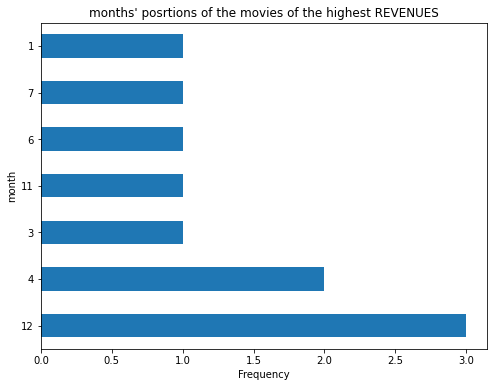

In [83]:
rev_month.plot(kind='barh',figsize=(8,6) , title="months' posrtions of the movies of the highest REVENUES");
plt.xlabel('Frequency')
plt.ylabel('month');

but **December** was the month of releasing 3 of the movies of the highest revenues.

#### 3.4. Genres of the Movies of the highest revenues

In [84]:
rev_gen=rev[["genre1","genre2","genre3","genre4","genre5"]]

In [85]:
rev_gen_melt= rev_gen.melt()

rev_genre= pd.crosstab(index=rev_gen_melt["value"], columns=rev_gen_melt['variable'])
rev_genre

variable,genre1,genre2,genre3,genre4,genre5
value,,,,,
Action,2,2,0,0,1
Adventure,2,3,2,0,0
Animation,0,1,0,0,0
Comedy,0,0,1,0,0
Crime,1,0,0,0,0
Drama,2,1,0,0,0
Family,0,0,1,1,0
Fantasy,0,0,1,2,0
Horror,1,1,0,0,0


In [86]:
rev_genre['total']= rev_genre.genre1 +rev_genre.genre2+rev_genre.genre3+rev_genre.genre4
rev_genre=rev_genre.sort_values(ascending=False, by=["total"])
rev_genre

variable,genre1,genre2,genre3,genre4,genre5,total
value,,,,,,
Adventure,2,3,2,0,0,7
Science Fiction,2,0,2,1,0,5
Action,2,2,0,0,1,4
Thriller,0,1,2,1,0,4
Drama,2,1,0,0,0,3
Fantasy,0,0,1,2,0,3
Family,0,0,1,1,0,2
Horror,1,1,0,0,0,2
Animation,0,1,0,0,0,1


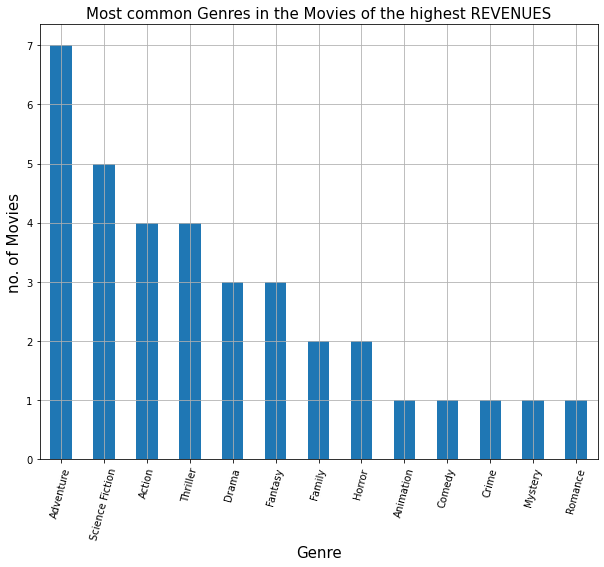

In [87]:
rev_genre.total.plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Most common Genres in the Movies of the highest REVENUES",fontsize=15)
plt.xlabel("Genre", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

**Adventure** still the most common Genre, this time in the most common genre in the movies of the highest revenues

#### 3.5. Production Companies of the Movies of the highest revenues

In [88]:
rev_prd= rev[['production1','production2','production3','production4','production5']]


In [89]:
rev_prd_melt= rev_prd.melt()
rev_comp= pd.crosstab(index=rev_prd_melt["value"], columns=rev_prd_melt['variable'])
rev_comp

variable,production1,production2,production3,production4
value,,,,
Amblin Entertainment,0,1,0,0
Bad Robot,0,0,1,0
Columbia Pictures,1,0,0,0
Dune Entertainment,0,0,1,0
Hoya Productions,0,1,0,0
Ingenious Film Partners,1,0,0,0
Lightstorm Entertainment,0,0,1,1
Lucasfilm,2,0,0,0
Marvel Studios,1,0,0,0


In [90]:
rev_comp["total"]=rev_comp.production1+rev_comp.production2+rev_comp.production3+rev_comp.production4
rev_comp= rev_comp.sort_values(ascending=False, by=["total"])
rev_comp

variable,production1,production2,production3,production4,total
value,,,,,
Twentieth Century Fox Film Corporation,0,3,0,0,3
Lightstorm Entertainment,0,0,1,1,2
Lucasfilm,2,0,0,0,2
Universal Pictures,2,0,0,0,2
Amblin Entertainment,0,1,0,0,1
Bad Robot,0,0,1,0,1
Columbia Pictures,1,0,0,0,1
Dune Entertainment,0,0,1,0,1
Hoya Productions,0,1,0,0,1


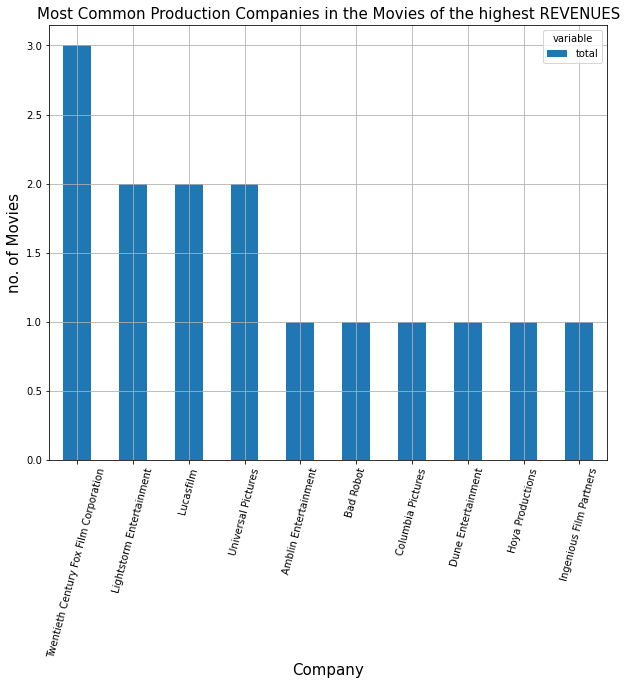

In [91]:
rev_comp_total= rev_comp[["total"]]

rev_comp_total.head(10).plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Most Common Production Companies in the Movies of the highest REVENUES",fontsize=15)
plt.xlabel("Company", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

**Twentieth Century Corporation** Produced three Movies of the highest Revenues

#### 3.6. Actors of the Movies of the highest revenues

In [92]:
rev_act= rev[['cast1','cast2','cast3','cast4','cast5']]


In [93]:
rev_act_melt= rev_act.melt()
rev_cast=pd.crosstab(index=rev_act_melt["value"], columns=rev_act_melt["variable"])
rev_cast

variable,cast1,cast2,cast3,cast4,cast5
value,,,,,
Adam Driver,0,0,0,1,0
Alec Guinness,0,0,0,0,1
Ben Wright,0,0,0,0,1
Betty Lou Gerson,0,0,1,0,0
Billy Zane,0,0,0,1,0
Carrie Fisher,0,0,2,0,0
Chris Evans,0,1,0,0,0
Chris Hemsworth,0,0,0,1,0
Daisy Ridley,0,0,0,0,1


In [94]:
rev_cast["total"]=rev_cast.cast1+rev_cast.cast2+rev_cast.cast3+rev_cast.cast4+rev_cast.cast5
rev_cast= rev_cast.sort_values(ascending=False, by=["total"])
rev_cast

variable,cast1,cast2,cast3,cast4,cast5,total
value,,,,,,
Mark Hamill,1,1,0,0,0,2
Carrie Fisher,0,0,2,0,0,2
Harrison Ford,1,1,0,0,0,2
Robert Downey Jr.,1,0,0,0,0,1
Mark Ruffalo,0,0,1,0,0,1
Martha Wentworth,0,0,0,1,0,1
Max von Sydow,0,1,0,0,0,1
Michelle Rodriguez,0,0,0,0,1,1
Murray Hamilton,0,0,0,0,1,1


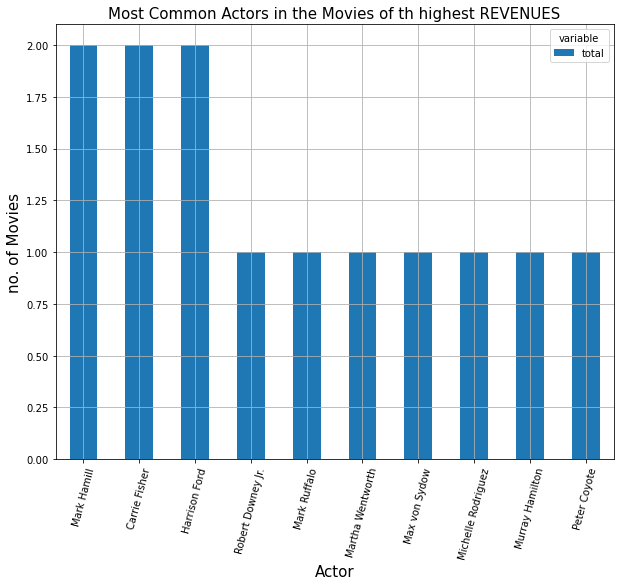

In [95]:
rev_cast_total= rev_cast[["total"]]

rev_cast_total.head(10).plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Most Common Actors in the Movies of th highest REVENUES",fontsize=15)
plt.xlabel("Actor", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

again **Mark Hamill**, **Carrier Fisher**, and **Harrison Ford** each have been part of two of the movies of the highest revenues

### Q4: Which are the Movies of the highest Profit?

In [96]:
prof= df.sort_values(ascending= False, by=["profit"]).head(10)
prof

,id,popularity,budget,revenue,original_title,director,keywords,runtime,release_date,vote_count,...,cast1,cast2,cast3,cast4,cast5,production1,production2,production3,production4,production5
1329,11,12.037933,11000000.0,7.753980e+08,Star Wars,George Lucas,android|galaxy|hermit|death star|lightsaber,121.0,1977-03-20,4428,...,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness,Lucasfilm,Twentieth Century Fox Film Corporation,None,None,None
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,James Cameron,culture clash|future|space war|space colony|so...,162.0,2009-12-10,8458,...,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,Michelle Rodriguez,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,Lightstorm Entertainment,None
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,James Cameron,shipwreck|iceberg|ship|panic|titanic,194.0,1997-11-18,4654,...,Kate Winslet,Leonardo DiCaprio,Frances Fisher,Billy Zane,Kathy Bates,Paramount Pictures,Twentieth Century Fox Film Corporation,Lightstorm Entertainment,None,None
10594,9552,2.010733,8000000.0,4.413061e+08,The Exorcist,William Friedkin,exorcism|holy water|religion and supernatural|...,122.0,1973-12-26,1113,...,Linda Blair,Max von Sydow,Ellen Burstyn,Jason Miller,Lee J. Cobb,Warner Bros.,Hoya Productions,None,None,None
9806,578,2.563191,7000000.0,4.706540e+08,Jaws,Steven Spielberg,fishing|atlantic ocean|bathing|shipwreck|polic...,124.0,1975-06-18,1415,...,Roy Scheider,Robert Shaw,Richard Dreyfuss,Lorraine Gary,Murray Hamilton,Universal Pictures,Zanuck/Brown Productions,None,None,None
8889,601,2.900556,10500000.0,7.929106e+08,E.T. the Extra-Terrestrial,Steven Spielberg,farewell|homesickness|nasa|extraterrestrial te...,115.0,1982-04-03,1830,...,Henry Thomas,Drew Barrymore,Robert MacNaughton,Dee Wallace,Peter Coyote,Universal Pictures,Amblin Entertainment,None,None,None
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,2015-12-15,5292,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,None,None
8094,1642,1.136610,22000000.0,1.106280e+09,The Net,Irwin Winkler,cheating|new identity|computer virus|chase|com...,114.0,1995-07-28,201,...,Sandra Bullock,Jeremy Northam,Dennis Miller,Wendy Gazelle,Ken Howard,Columbia Pictures,None,None,None,None
10110,12230,2.631987,4000000.0,2.158800e+08,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,puppy|animation|dog|dalmatian,79.0,2061-01-25,913,...,Rod Taylor,J. Pat O'Malley,Betty Lou Gerson,Martha Wentworth,Ben Wright,Walt Disney Productions,None,None,None,None
7309,1891,5.488441,18000000.0,5.384000e+08,The Empire Strikes Back,Irvin Kershner,rebel|asteroid|space battle|snow storm|space c...,124.0,1980-01-01,3954,...,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,Anthony Daniels,Lucasfilm,Twentieth Century Fox Film Corporation,None,None,None


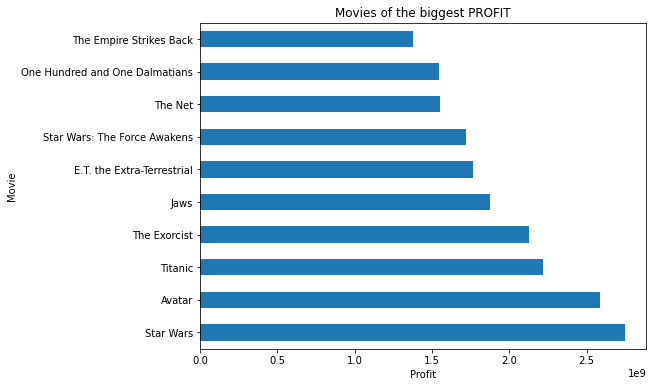

In [97]:
df.groupby("original_title")["profit"].sum().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(8,6) , title='Movies of the biggest PROFIT');
plt.xlabel('Profit')
plt.ylabel('Movie');

**Star Wars** was the movie of the highest profit 
then it was **Avatar**

#### 4.1. Actors of the Movies of the highest Profit

In [98]:
prof_act= prof[['cast1','cast2','cast3','cast4','cast5']]


In [99]:
prof_act_melt= rev_act.melt()
prof_cast=pd.crosstab(index=prof_act_melt["value"], columns=prof_act_melt["variable"])
prof_cast

variable,cast1,cast2,cast3,cast4,cast5
value,,,,,
Adam Driver,0,0,0,1,0
Alec Guinness,0,0,0,0,1
Ben Wright,0,0,0,0,1
Betty Lou Gerson,0,0,1,0,0
Billy Zane,0,0,0,1,0
Carrie Fisher,0,0,2,0,0
Chris Evans,0,1,0,0,0
Chris Hemsworth,0,0,0,1,0
Daisy Ridley,0,0,0,0,1


In [100]:
prof_cast["total"]=prof_cast.cast1+prof_cast.cast2+prof_cast.cast3+prof_cast.cast4+prof_cast.cast5
prof_cast= prof_cast.sort_values(ascending=False, by=["total"])
prof_cast

variable,cast1,cast2,cast3,cast4,cast5,total
value,,,,,,
Mark Hamill,1,1,0,0,0,2
Carrie Fisher,0,0,2,0,0,2
Harrison Ford,1,1,0,0,0,2
Robert Downey Jr.,1,0,0,0,0,1
Mark Ruffalo,0,0,1,0,0,1
Martha Wentworth,0,0,0,1,0,1
Max von Sydow,0,1,0,0,0,1
Michelle Rodriguez,0,0,0,0,1,1
Murray Hamilton,0,0,0,0,1,1


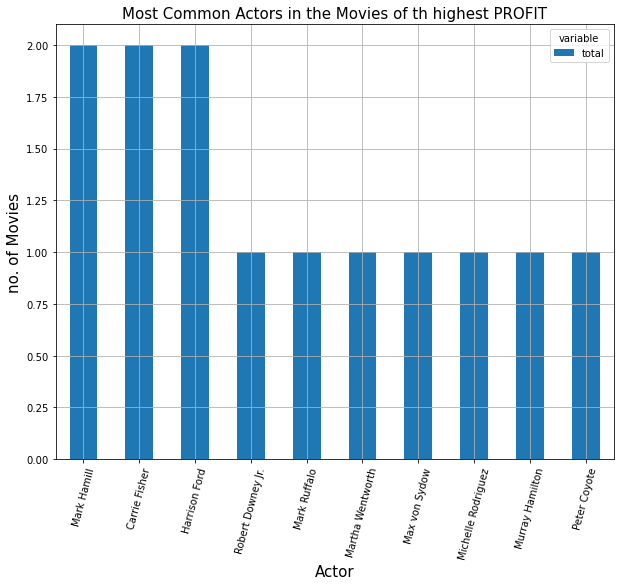

In [101]:
prof_cast_total= prof_cast[["total"]]

prof_cast_total.head(10).plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Most Common Actors in the Movies of th highest PROFIT",fontsize=15)
plt.xlabel("Actor", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

again **Mark Hamill**, **Carrier Fisher**, and **Harrison Ford** each have been part of two of the movies of the highest Profit.

#### 4.2. Production Companies of the Movies of the highest Profit

In [102]:
prof_prd= prof[['production1','production2','production3','production4','production5']]


In [103]:
prof_prd_melt= prof_prd.melt()
prof_comp= pd.crosstab(index=prof_prd_melt["value"], columns=prof_prd_melt['variable'])
prof_comp

variable,production1,production2,production3,production4
value,,,,
Amblin Entertainment,0,1,0,0
Bad Robot,0,0,1,0
Columbia Pictures,1,0,0,0
Dune Entertainment,0,0,1,0
Hoya Productions,0,1,0,0
Ingenious Film Partners,1,0,0,0
Lightstorm Entertainment,0,0,1,1
Lucasfilm,3,0,0,0
Paramount Pictures,1,0,0,0


In [104]:
prof_comp["total"]=prof_comp.production1+prof_comp.production2+prof_comp.production3+prof_comp.production4
prof_comp= prof_comp.sort_values(ascending=False, by=["total"])
prof_comp


variable,production1,production2,production3,production4,total
value,,,,,
Twentieth Century Fox Film Corporation,0,4,0,0,4
Lucasfilm,3,0,0,0,3
Lightstorm Entertainment,0,0,1,1,2
Universal Pictures,2,0,0,0,2
Amblin Entertainment,0,1,0,0,1
Bad Robot,0,0,1,0,1
Columbia Pictures,1,0,0,0,1
Dune Entertainment,0,0,1,0,1
Hoya Productions,0,1,0,0,1


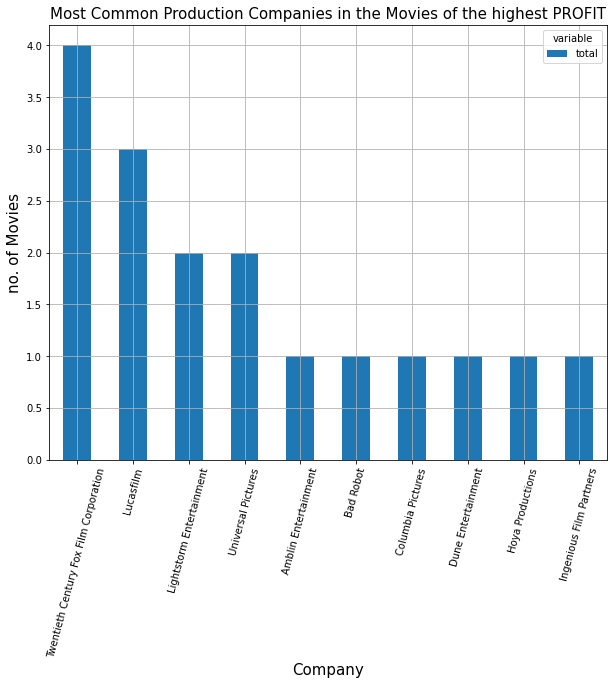

In [105]:
prof_comp_total= prof_comp[["total"]]

prof_comp_total.head(10).plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Most Common Production Companies in the Movies of the highest PROFIT",fontsize=15)
plt.xlabel("Company", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

**Twentieth Century Corporation** Produced three Movies of the highest Revenues and as well it produced **Four** movies of the highest profit

#### 4.3. Genres of the Movies of the highest Profit

In [106]:
prof_gen=prof[["genre1","genre2","genre3","genre4","genre5"]]


In [107]:
prof_gen_melt= prof_gen.melt()

prof_genre= pd.crosstab(index=prof_gen_melt["value"], columns=prof_gen_melt['variable'])
prof_genre


variable,genre1,genre2,genre3,genre4,genre5
value,,,,,
Action,2,2,0,0,1
Adventure,3,3,1,0,0
Animation,0,1,0,0,0
Comedy,0,0,1,0,0
Crime,1,0,0,0,0
Drama,2,1,0,0,0
Family,0,0,1,1,0
Fantasy,0,0,1,2,0
Horror,1,1,0,0,0


In [108]:
prof_genre['total']= prof_genre.genre1 +prof_genre.genre2+prof_genre.genre3+prof_genre.genre4
prof_genre=prof_genre.sort_values(ascending=False, by=["total"])
prof_genre

variable,genre1,genre2,genre3,genre4,genre5,total
value,,,,,,
Adventure,3,3,1,0,0,7
Science Fiction,1,0,3,1,0,5
Action,2,2,0,0,1,4
Thriller,0,1,2,1,0,4
Drama,2,1,0,0,0,3
Fantasy,0,0,1,2,0,3
Family,0,0,1,1,0,2
Horror,1,1,0,0,0,2
Animation,0,1,0,0,0,1


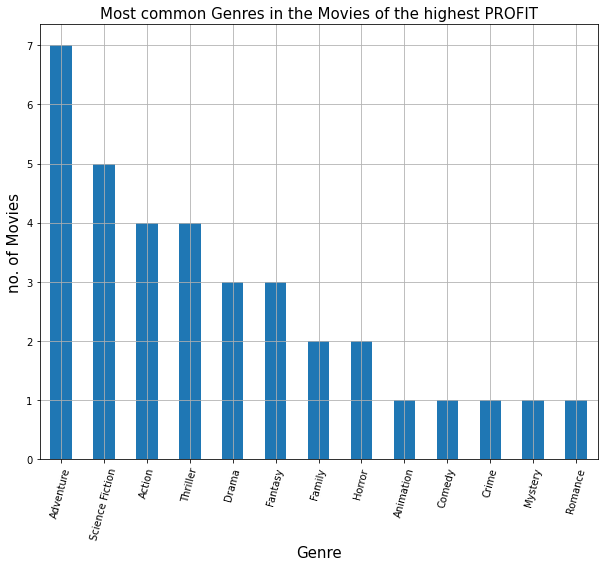

In [109]:
prof_genre.total.plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Most common Genres in the Movies of the highest PROFIT",fontsize=15)
plt.xlabel("Genre", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

again Genre **Adventure** were the genre of 7 of the movies of the highest profit 

#### 4.4. Directors of the Movies of the highest Profit

In [110]:
prof_direct=prof.director.value_counts()
prof_direct

James Cameron                                        2
Steven Spielberg                                     2
George Lucas                                         1
William Friedkin                                     1
J.J. Abrams                                          1
Irwin Winkler                                        1
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    1
Irvin Kershner                                       1
Name: director, dtype: int64

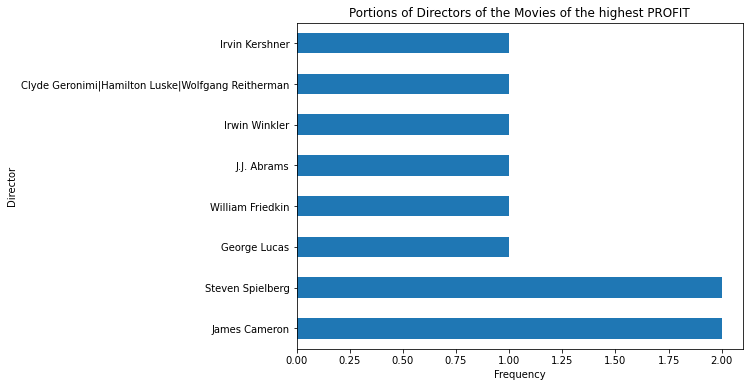

In [111]:
prof_direct.plot(kind='barh',figsize=(8,6) , title='Portions of Directors of the Movies of the highest PROFIT');
plt.xlabel('Frequency')
plt.ylabel('Director');

**james cameron** directed 2 of the highest proift as well as **Steven Spielberg**

#### 4.5. Years of the Movies of the highest Profit

In [112]:
prof_year=prof.release_year.value_counts()
prof_year

1977    1
2009    1
1997    1
1973    1
1975    1
1982    1
2015    1
1995    1
1961    1
1980    1
Name: release_year, dtype: int64

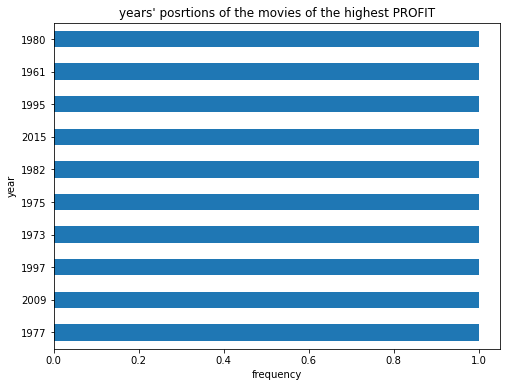

In [113]:
prof_year.plot(kind='barh',figsize=(8,6) , title="years' posrtions of the movies of the highest PROFIT");
plt.xlabel('frequency')
plt.ylabel('year');

there were no unique year between the years of releasing movies of the highest profit 

#### 4.6. Months of the Movies of the highest Profit

In [114]:
prof_month= prof.release_month.value_counts()
prof_month


12    3
1     2
3     1
11    1
6     1
4     1
7     1
Name: release_month, dtype: int64

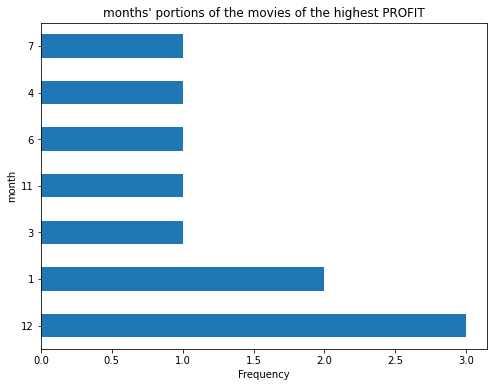

In [115]:
prof_month.plot(kind='barh',figsize=(8,6) , title="months' portions of the movies of the highest PROFIT");
plt.xlabel('Frequency')
plt.ylabel('month');

**December** has three of the movies of the highest profit 

#### Q5: Which are the movies of the highest Voting?

In [116]:
vote=df.sort_values(ascending=False, by=["vote_average"]).head(10)
vote

,id,popularity,budget,revenue,original_title,director,keywords,runtime,release_date,vote_count,...,cast1,cast2,cast3,cast4,cast5,production1,production2,production3,production4,production5
3894,125336,0.006925,3.073943e+07,8.922066e+07,The Story of Film: An Odyssey,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900.0,2011-09-03,14,...,Mark Cousins,Jean-Michel Frodon,Cari Beauchamp,Agnes de Mille,None,NaN,NaN,NaN,NaN,NaN
538,224972,0.114264,3.073943e+07,8.922066e+07,The Mask You Live In,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,88.0,2015-01-01,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,374430,0.129531,3.073943e+07,8.922066e+07,Black Mirror: White Christmas,Carl Tibbetts,artificial intelligence|confession|technology|...,74.0,2014-12-16,41,...,Jon Hamm,Rafe Spall,Oona Chaplin,Natalia Tena,Janet Montgomery,NaN,NaN,NaN,NaN,NaN
2269,51299,0.222293,3.073943e+07,8.922066e+07,Life Cycles,Derek Frankowski,sport|cycling,47.0,2010-10-02,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6911,24970,0.212010,3.073943e+07,8.922066e+07,Pink Floyd: Pulse,David Mallet,live concert,145.0,2006-07-09,23,...,David Gilmour,Nick Mason,Richard Wright,Sam Brown,Jon Carin,SMV Enterprises,Columbia Music Video,EMI,None,None
2401,45644,0.067753,3.073943e+07,8.922066e+07,Opeth: In Live Concert At The Royal Albert Hall,NaN,NaN,163.0,2010-09-21,10,...,Mikael Ã…kerfeldt,"Martin ""Axe"" Axenrot",Martin Mendez,Per Wiberg,Fredrik Ã…kesson,NaN,NaN,NaN,NaN,NaN
3690,68450,0.321341,3.073943e+07,8.922066e+07,The Art of Flight,Curt Morgan,sport|snowboard,80.0,2011-09-08,60,...,Travis Rice,Nicolas Muller,Mark Landvik,Jake Blauvelt,Pat Moore,Red Bull Media House,Brain Farm Digital Cinema,None,None,None
8411,25093,0.302908,3.073943e+07,8.922066e+07,Queen - Rock Montreal,Saul Swimmer,live concert,138.0,1981-11-24,14,...,Freddie Mercury,Roger Taylor,John Deacon,Brian May,None,Edel records GmbH,None,None,None,None
8221,55676,0.194889,3.073943e+07,8.922066e+07,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Michael Henry Wilson,NaN,225.0,1995-05-21,11,...,Martin Scorsese,Brian De Palma,Gregory Peck,Frank Capra,Francis Ford Coppola,Miramax Films,British Film Institute (BFI),None,None,None
8839,16275,0.157001,3.073943e+07,8.922066e+07,Dave Chappelle: Killin' Them Softly,Stan Lathan,stand-up|stand up comedy,57.0,2000-01-01,17,...,Dave Chappelle,None,None,None,None,NaN,NaN,NaN,NaN,NaN


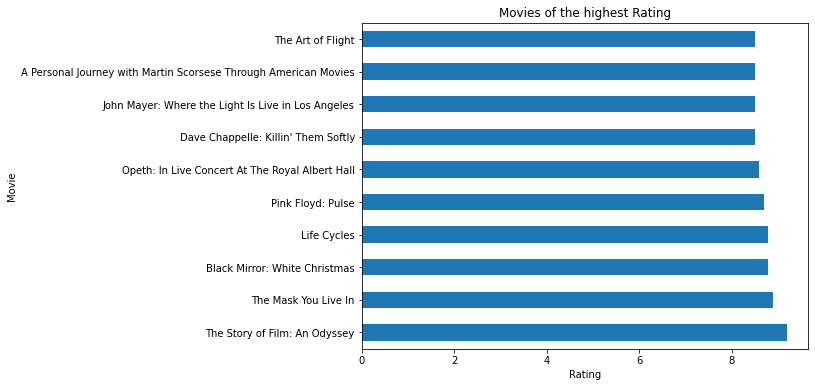

In [117]:
df.groupby("original_title")["vote_average"].mean().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(8,6) , title='Movies of the highest Rating');
plt.xlabel('Rating')
plt.ylabel('Movie');

the voting race wasn't easy, but **The story of Film: An Odyssey** was on the top of the votings

#### 5.1. Production Companies of the movies of the highest Voting

In [118]:
vote_prd= vote[['production1','production2','production3','production4','production5']]


In [119]:
vote_prd_melt= vote_prd.melt()
vote_comp= pd.crosstab(index=vote_prd_melt["value"], columns=vote_prd_melt['variable'])
vote_comp

variable,production1,production2,production3
value,,,
Brain Farm Digital Cinema,0,1,0
British Film Institute (BFI),0,1,0
Columbia Music Video,0,1,0
EMI,0,0,1
Edel records GmbH,1,0,0
Miramax Films,1,0,0
Red Bull Media House,1,0,0
SMV Enterprises,1,0,0


In [120]:
vote_comp["total"]=vote_comp.production1+vote_comp.production2+vote_comp.production3
vote_comp= vote_comp.sort_values(ascending=False, by=["total"])
vote_comp

variable,production1,production2,production3,total
value,,,,
Brain Farm Digital Cinema,0,1,0,1
British Film Institute (BFI),0,1,0,1
Columbia Music Video,0,1,0,1
EMI,0,0,1,1
Edel records GmbH,1,0,0,1
Miramax Films,1,0,0,1
Red Bull Media House,1,0,0,1
SMV Enterprises,1,0,0,1


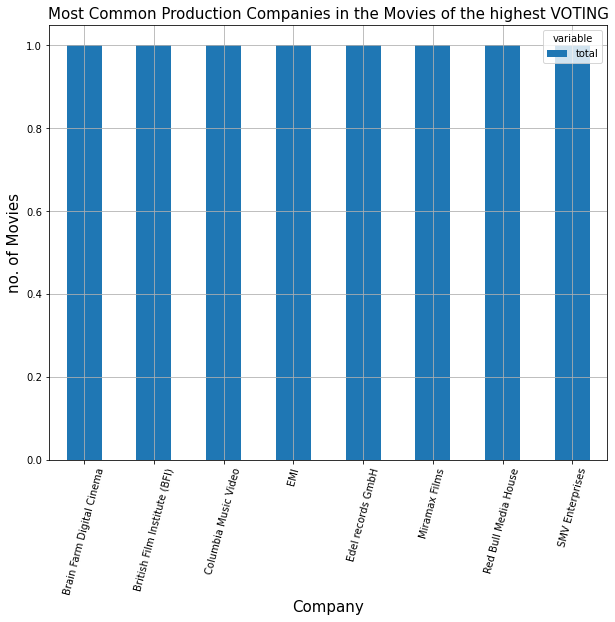

In [121]:
vote_comp_total= vote_comp[["total"]]

vote_comp_total.head(10).plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Most Common Production Companies in the Movies of the highest VOTING",fontsize=15)
plt.xlabel("Company", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

we can see that each company of the above has just produced one movie of the movies of the highest voting

#### 5.2. Genres of the movies of the highest Voting

In [122]:
vote_gen=vote[["genre1","genre2","genre3","genre4","genre5"]]


In [123]:
vote_gen_melt= vote_gen.melt()

vote_genre= pd.crosstab(index=vote_gen_melt["value"], columns=vote_gen_melt['variable'])
vote_genre

variable,genre1,genre2,genre3,genre4,genre5
value,,,,,
Adventure,1,0,0,0,0
Comedy,1,0,0,0,0
Documentary,4,1,0,0,0
Drama,1,0,0,0,0
Horror,0,1,0,0,0
Music,3,0,0,0,0
Mystery,0,0,1,0,0
Science Fiction,0,0,0,1,0
Thriller,0,0,0,0,1


In [124]:
vote_genre['total']= vote_genre.genre1 +vote_genre.genre2+vote_genre.genre3+vote_genre.genre4
vote_genre=vote_genre.sort_values(ascending=False, by=["total"])
vote_genre

variable,genre1,genre2,genre3,genre4,genre5,total
value,,,,,,
Documentary,4,1,0,0,0,5
Music,3,0,0,0,0,3
Adventure,1,0,0,0,0,1
Comedy,1,0,0,0,0,1
Drama,1,0,0,0,0,1
Horror,0,1,0,0,0,1
Mystery,0,0,1,0,0,1
Science Fiction,0,0,0,1,0,1
Thriller,0,0,0,0,1,0


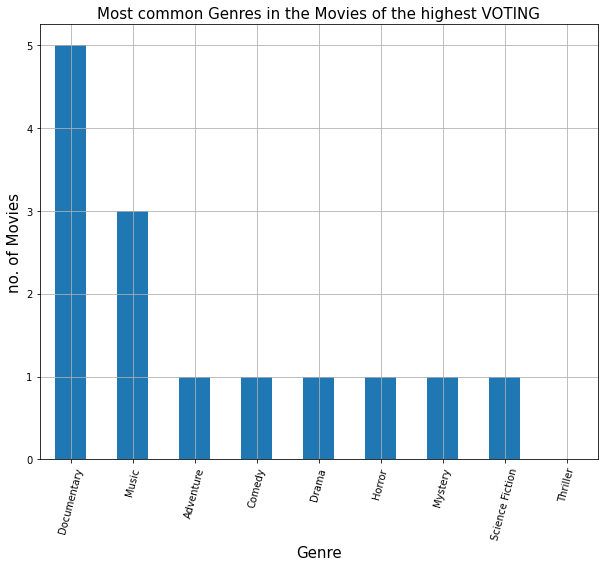

In [125]:
vote_genre.total.plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Most common Genres in the Movies of the highest VOTING",fontsize=15)
plt.xlabel("Genre", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

maybe a surprise but **Documentry** was the genre of the movies of the highest voting

#### 5.3. Actors of the movies of the highest Voting

In [126]:
vote_act= vote[['cast1','cast2','cast3','cast4','cast5']]


In [127]:
vote_act_melt= vote_act.melt()
vote_cast=pd.crosstab(index=vote_act_melt["value"], columns=vote_act_melt["variable"])
vote_cast

variable,cast1,cast2,cast3,cast4,cast5
value,,,,,
Agnes de Mille,0,0,0,1,0
Brian De Palma,0,1,0,0,0
Brian May,0,0,0,1,0
Cari Beauchamp,0,0,1,0,0
Dave Chappelle,1,0,0,0,0
David Gilmour,1,0,0,0,0
Francis Ford Coppola,0,0,0,0,1
Frank Capra,0,0,0,1,0
Freddie Mercury,1,0,0,0,0


In [128]:
vote_cast["total"]=vote_cast.cast1+vote_cast.cast2+vote_cast.cast3+vote_cast.cast4+vote_cast.cast5
vote_cast= vote_cast.sort_values(ascending=False, by=["total"])
vote_cast

variable,cast1,cast2,cast3,cast4,cast5,total
value,,,,,,
Agnes de Mille,0,0,0,1,0,1
Nicolas Muller,0,1,0,0,0,1
"Martin ""Axe"" Axenrot",0,1,0,0,0,1
Martin Mendez,0,0,1,0,0,1
Martin Scorsese,1,0,0,0,0,1
Mikael Ã…kerfeldt,1,0,0,0,0,1
Natalia Tena,0,0,0,1,0,1
Nick Mason,0,1,0,0,0,1
Oona Chaplin,0,0,1,0,0,1


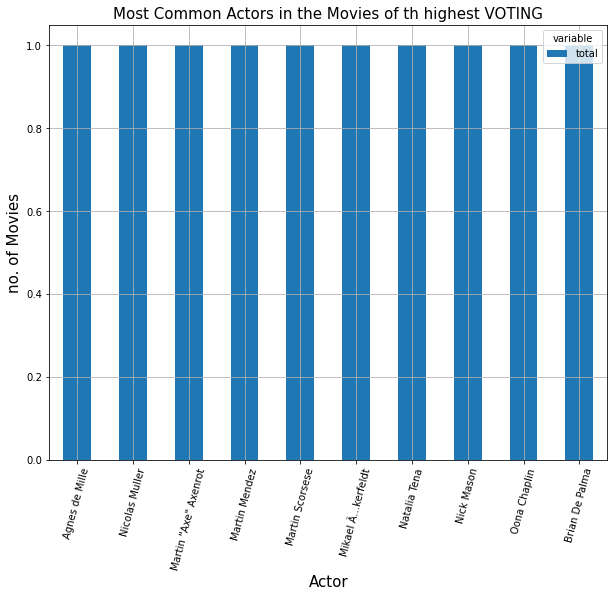

In [129]:
vote_cast_total= vote_cast[["total"]]

vote_cast_total.head(10).plot(kind="bar", figsize=(10,8), grid=True)
plt.title("Most Common Actors in the Movies of th highest VOTING",fontsize=15)
plt.xlabel("Actor", fontsize=15)
plt.xticks(rotation = 75)
plt.ylabel("no. of Movies", fontsize=15);

none of the above Actors was leading the rest, they were all equal in their portions of contribution.

#### 5.4. Directors of the movies of the highest Voting

In [130]:
vote_direct=vote.director.value_counts()
vote_direct


Mark Cousins                            1
Jennifer Siebel Newsom                  1
Carl Tibbetts                           1
Derek Frankowski                        1
David Mallet                            1
Curt Morgan                             1
Saul Swimmer                            1
Martin Scorsese|Michael Henry Wilson    1
Stan Lathan                             1
Name: director, dtype: int64

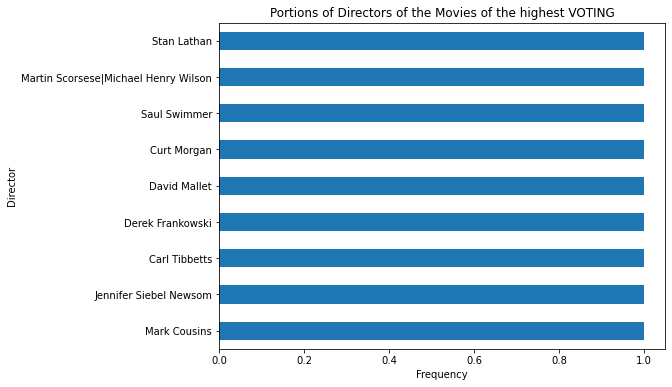

In [131]:
vote_direct.plot(kind='barh',figsize=(8,6) , title='Portions of Directors of the Movies of the highest VOTING');
plt.xlabel('Frequency')
plt.ylabel('Director');

none of the above Directors was leading the rest, they were all equal in their portions of contribution in the movies of the highest voting.

#### 5.5. Years of the movies of the highest Voting

In [132]:
vote_year=vote.release_year.value_counts()
vote_year

2011    2
2010    2
2015    1
2014    1
2006    1
1981    1
1995    1
2000    1
Name: release_year, dtype: int64

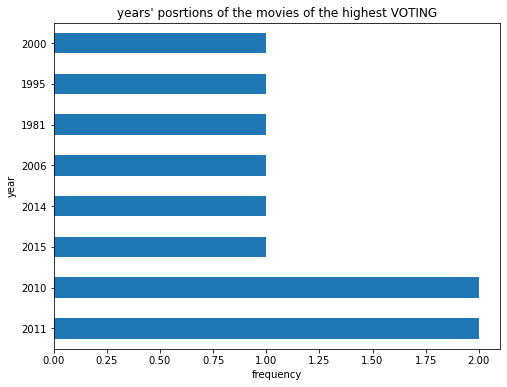

In [133]:
vote_year.plot(kind='barh',figsize=(8,6) , title="years' posrtions of the movies of the highest VOTING");
plt.xlabel('frequency')
plt.ylabel('year');

#### 5.6. months of the movies of the highest Voting

In [134]:
vote_month= vote.release_month.value_counts()
vote_month


9     3
1     2
12    1
10    1
7     1
11    1
5     1
Name: release_month, dtype: int64

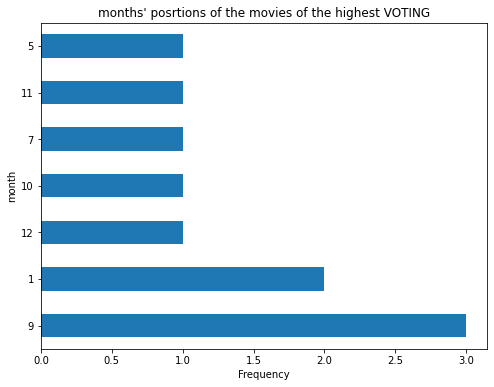

In [135]:
vote_month.plot(kind='barh',figsize=(8,6) , title="months' posrtions of the movies of the highest VOTING");
plt.xlabel('Frequency')
plt.ylabel('month');

three of the movies of the highest voting were released in **Septmeber**

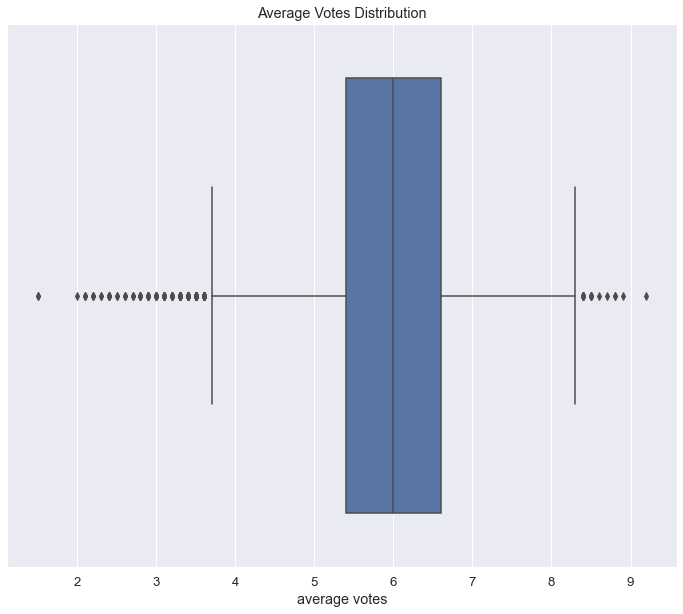

In [136]:
sb.set(rc={'figure.figsize':(12,10)}, font_scale=1.2)
df_x = df[["vote_average"]]
ax = sb.boxplot(x = df_x.vote_average)
ax.fontsize=12
ax.set(xlabel='average votes', title = 'Average Votes Distribution')
plt.show()

and that's how was the average votes in general.

### Q6: Which are the movies of the biggest budget?

In [137]:
budg=df.sort_values(ascending=False, by=["budget_adj"]).head(10)
budg

,id,popularity,budget,revenue,original_title,director,keywords,runtime,release_date,vote_count,...,cast1,cast2,cast3,cast4,cast5,production1,production2,production3,production4,production5
2244,46528,0.250540,425000000.0,1.108757e+07,The Warrior's Way,Sngmoo Lee,assassin|small town|revenge|deception|super speed,100.0,2010-12-02,74,...,Kate Bosworth,Jang Dong-gun,Geoffrey Rush,Danny Huston,Ti Lung,Boram Entertainment Inc.,None,None,None,None
3375,1865,4.955130,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,sea|captain|mutiny|sword|prime minister,136.0,2011-05-11,3180,...,Johnny Depp,PenÃ©lope Cruz,Geoffrey Rush,Ian McShane,Kevin McNally,Walt Disney Pictures,Jerry Bruckheimer Films,Moving Picture Company (MPC),None,None
7387,285,4.965391,300000000.0,9.610000e+08,Pirates of the Caribbean: At World's End,Gore Verbinski,ocean|drug abuse|exotic island|east india trad...,169.0,2007-05-19,2626,...,Johnny Depp,Orlando Bloom,Keira Knightley,Geoffrey Rush,Bill Nighy,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,None,None
6570,1452,1.957331,270000000.0,3.910812e+08,Superman Returns,Bryan Singer,saving the world|dc comics|invulnerability|seq...,154.0,2006-06-28,834,...,Brandon Routh,Kevin Spacey,Kate Bosworth,James Marsden,Parker Posey,DC Comics,Legendary Pictures,Warner Bros.,Bad Hat Harry Productions,None
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,James Cameron,shipwreck|iceberg|ship|panic|titanic,194.0,1997-11-18,4654,...,Kate Winslet,Leonardo DiCaprio,Frances Fisher,Billy Zane,Kathy Bates,Paramount Pictures,Twentieth Century Fox Film Corporation,Lightstorm Entertainment,None,None
7394,559,2.520912,258000000.0,8.908716e+08,Spider-Man 3,Sam Raimi,dual identity|amnesia|sandstorm|love of one's ...,139.0,2007-05-01,2083,...,Tobey Maguire,Kirsten Dunst,James Franco,Thomas Haden Church,Topher Grace,Columbia Pictures,Laura Ziskin Productions,Marvel Enterprises,None,None
1929,38757,2.865684,260000000.0,5.917949e+08,Tangled,Nathan Greno|Byron Howard,hostage|horse|fairy tale|musical|princess,100.0,2010-11-24,2019,...,Zachary Levi,Mandy Moore,Donna Murphy,Ron Perlman,M.C. Gainey,Walt Disney Pictures,Walt Disney Animation Studios,None,None,None
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Joss Whedon,marvel comic|comic|sequel|superhero|vision,141.0,2015-04-22,4304,...,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Chris Evans,Scarlett Johansson,Marvel Studios,Prime Focus,Revolution Sun Studios,None,None
1389,767,5.076472,250000000.0,9.339592e+08,Harry Potter and the Half-Blood Prince,David Yates,witch|broom|school of witchcraft|magic wand|ma...,153.0,2009-07-07,3220,...,Daniel Radcliffe,Rupert Grint,Emma Watson,Tom Felton,Julie Walters,Warner Bros.,Heyday Films,None,None,None
8089,9804,1.232098,175000000.0,2.642182e+08,Waterworld,Kevin Reynolds,ocean|tattoo|mutant|water|dystopia,135.0,1995-07-28,557,...,Kevin Costner,Chaim Girafi,Rick Aviles,R. D. Call,Zitto Kazann,Universal Pictures,Gordon Company,Davis Entertainment,Licht/Mueller Film Corporation,None


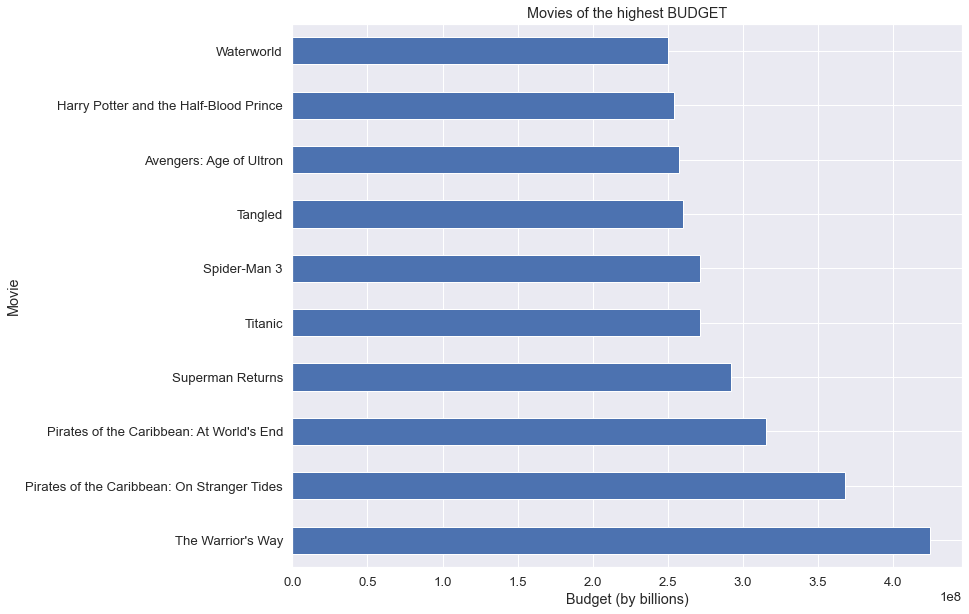

In [138]:
budg.groupby("original_title")["budget_adj"].sum().sort_values(ascending=False).plot(kind='barh', title='Movies of the highest BUDGET');
plt.xlabel('Budget (by billions)')
plt.ylabel('Movie');

Here is the movies which costed the biggest budgets
>**The Warrior's Way** costed the most , then it was **Pirates of the Cariibbean: on Stranger Tides**

### Q7: How have the movies changed over years?

#### 7.1. Runt-time:

In [139]:
year_avg_runtime=df.groupby("release_year")["runtime"].mean()
year_avg_runtime.head()

release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
Name: runtime, dtype: float64

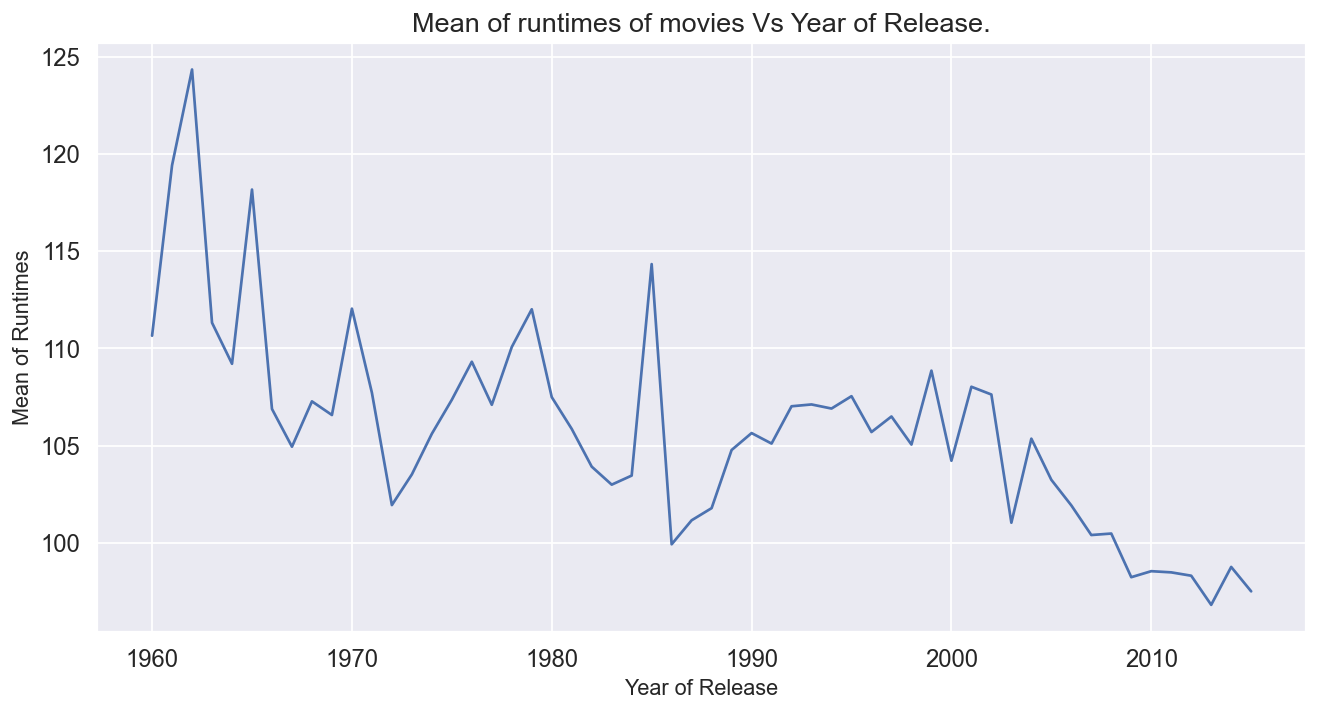

In [140]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Year of Release', fontsize = 12)

plt.ylabel('Mean of Runtimes', fontsize = 12)

plt.title('Mean of runtimes of movies Vs Year of Release.', fontsize=15)


plt.plot(year_avg_runtime)


plt.show()

we can notice how the **runtime** get reduced by years.

#### 7.2. Budgets:

In [141]:
year_avg_runtime=df.groupby("release_year")["budget_adj"].mean()
year_avg_runtime.head()

release_year
1960    3.160536e+07
1961    3.228385e+07
1962    3.308431e+07
1963    4.031999e+07
1964    3.384618e+07
Name: budget_adj, dtype: float64

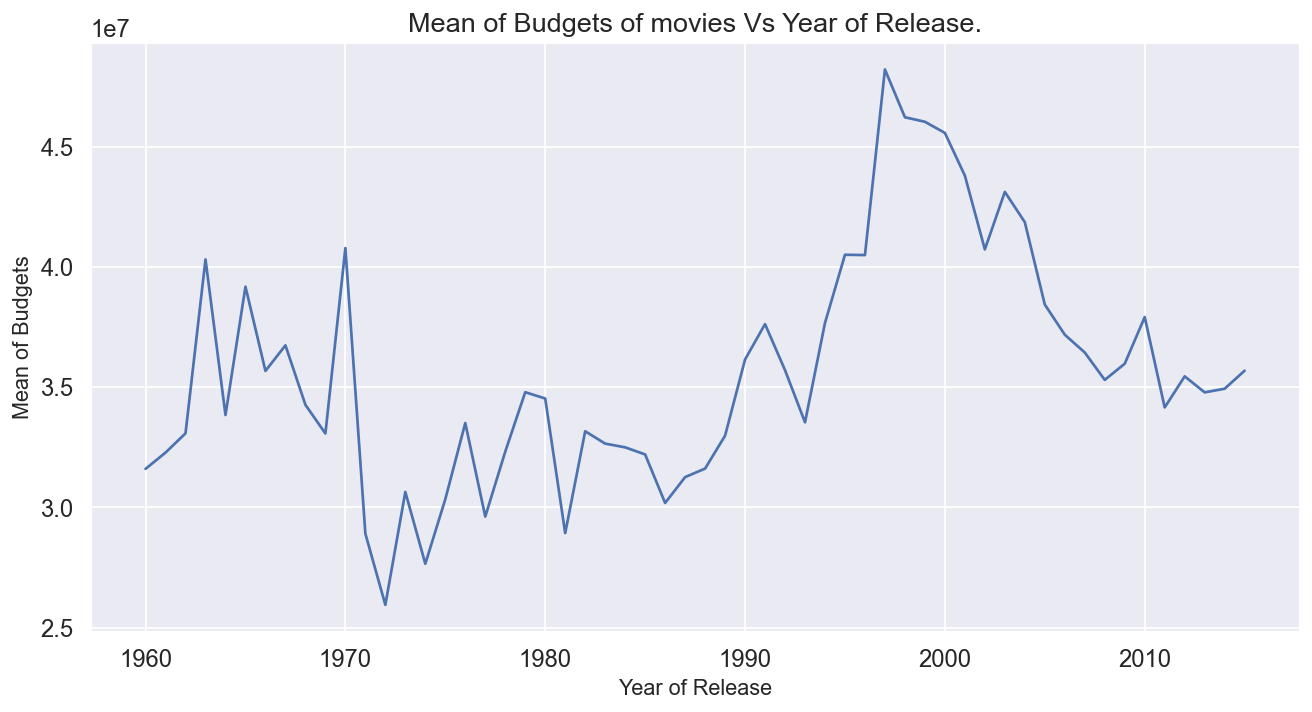

In [142]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Year of Release', fontsize = 12)

plt.ylabel('Mean of Budgets', fontsize = 12)

plt.title('Mean of Budgets of movies Vs Year of Release.', fontsize=15)


plt.plot(year_avg_runtime)


plt.show()

we can see that the budgets are varied but we can notice a trend of increasing 

#### 7.3. Revenues:

In [143]:
year_avg_revenue=df.groupby("release_year")["revenue_adj"].mean()
year_avg_revenue.head()

release_year
1960    1.233141e+08
1961    1.574273e+08
1962    1.312742e+08
1963    1.306308e+08
1964    1.502339e+08
Name: revenue_adj, dtype: float64

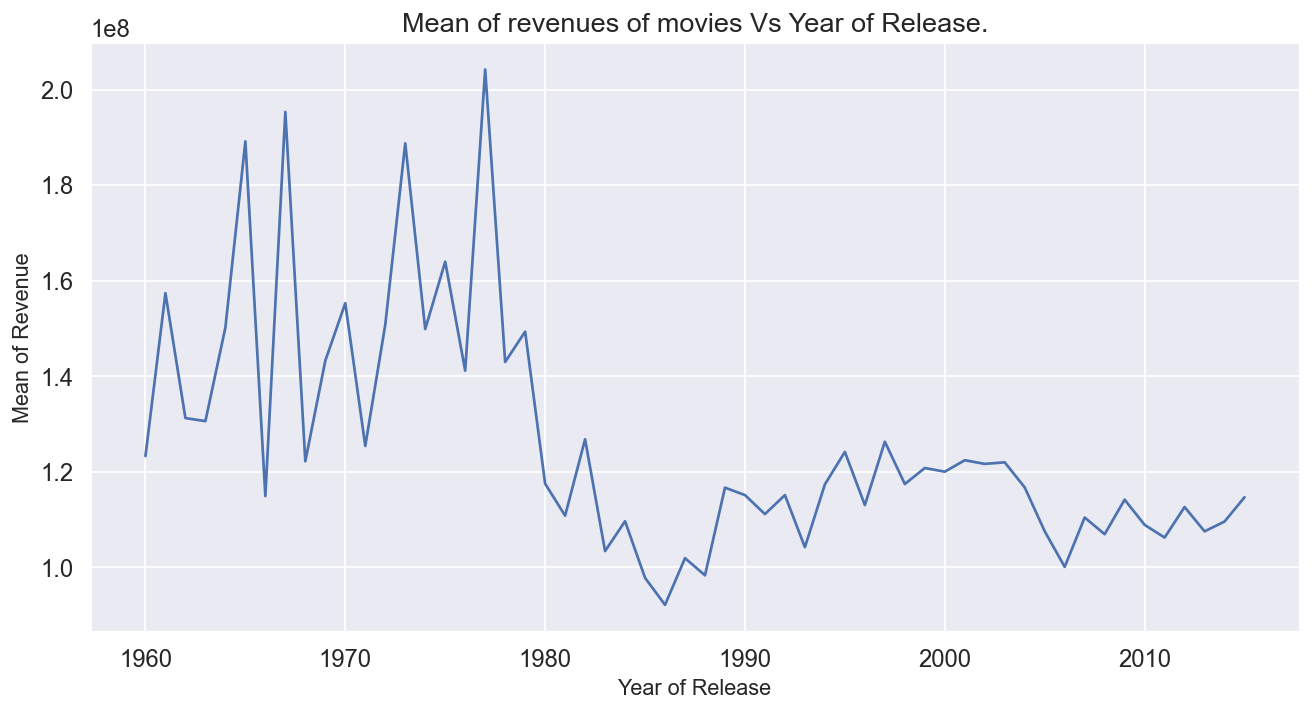

In [144]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Year of Release', fontsize = 12)

plt.ylabel('Mean of Revenue', fontsize = 12)

plt.title('Mean of revenues of movies Vs Year of Release.', fontsize=15)


plt.plot(year_avg_revenue)


plt.show()

the mean of the revenues seems to be decreasing by years 

#### 7.4. Vote_average:

In [145]:
year_avg_voting=df.groupby("release_year")["vote_average"].mean()
year_avg_voting.head()

release_year
1960    6.325000
1961    6.374194
1962    6.343750
1963    6.329412
1964    6.211905
Name: vote_average, dtype: float64

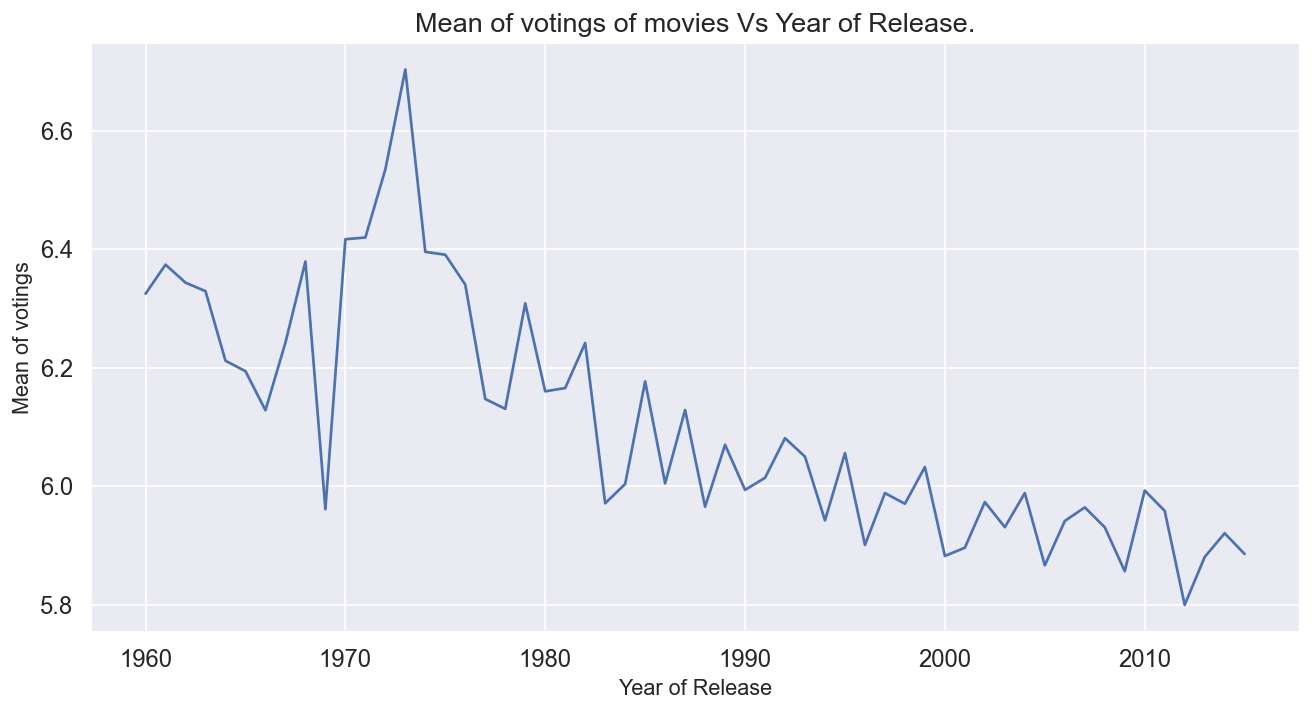

In [146]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Year of Release', fontsize = 12)

plt.ylabel('Mean of votings', fontsize = 12)

plt.title('Mean of votings of movies Vs Year of Release.', fontsize=15)


plt.plot(year_avg_voting)


plt.show()

it's noticed how the voting getting reduced by time


#### 7.5. Popularity:

In [147]:
year_avg_popularity=df.groupby("release_year")["popularity"].mean()
year_avg_popularity.sort_values(ascending=False).head()

release_year
2015    1.030657
2014    0.887268
2004    0.722438
2003    0.719083
1997    0.712003
Name: popularity, dtype: float64

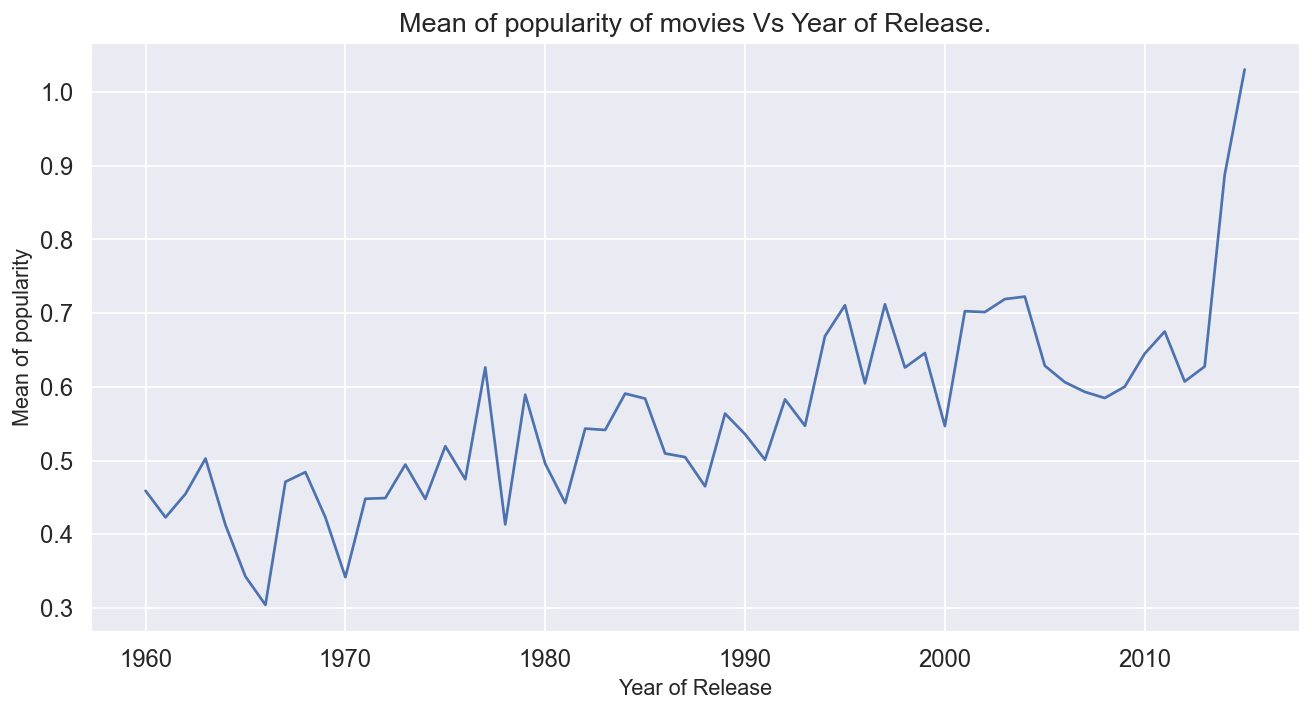

In [148]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Year of Release', fontsize = 12)

plt.ylabel('Mean of popularity', fontsize = 12)

plt.title('Mean of popularity of movies Vs Year of Release.', fontsize=15)


plt.plot(year_avg_popularity)


plt.show()

mean of popularity of movies getting higher by years and get the peak in 2015

#### 7.6. Profit:

In [149]:
year_avg_profit=df.groupby("release_year")["profit"].mean()
year_avg_profit.head()

release_year
1960    2.832787e+07
1961    6.861480e+07
1962    3.623546e+07
1963    2.388893e+07
1964    5.046705e+07
Name: profit, dtype: float64

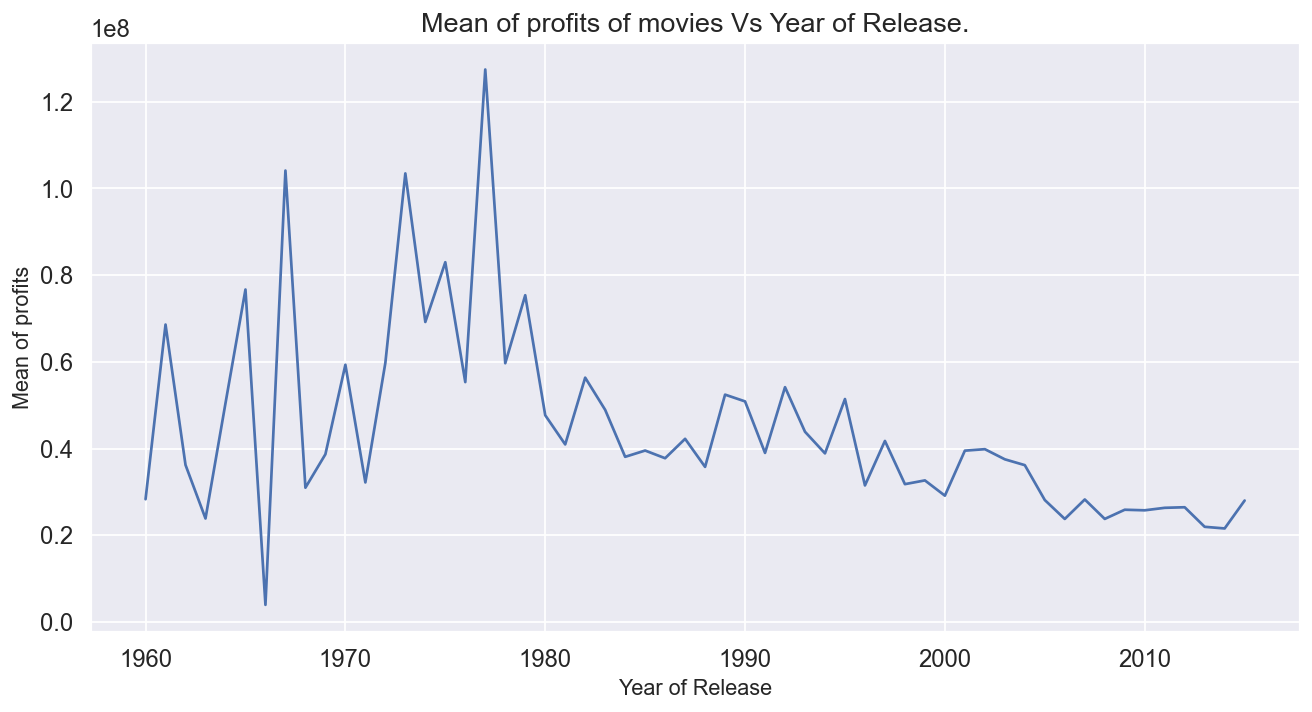

In [150]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Year of Release', fontsize = 12)

plt.ylabel('Mean of profits', fontsize = 12)

plt.title('Mean of profits of movies Vs Year of Release.', fontsize=15)


plt.plot(year_avg_profit)


plt.show()

we can notice an overall decreasing in the profits of the movies

### Q8: How to make the BIGGEST profit ??

 we would select each part as the average profit of it's contributions

#### 8.1. Production Company of contributions in the movies of the highest average profits

In [151]:
df.groupby(["production1","production2","production3","production4","production5"])['profit'].mean().sort_values(ascending=False).astype("int64").head().reset_index()

,production1,production2,production3,production4,production5,profit
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,1254445953
1,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films,1210948878
2,Walt Disney Pictures,Team Todd,Tim Burton Productions,Roth Films,"Zanuck Company, The",825467110
3,Village Roadshow Pictures,NPV Entertainment,Heineken Branded Entertainment,Silver Pictures,Warner Bros.,697698212
4,Lightstorm Entertainment,Pacific Western,Canal+,Carolco Pictures,T2 Productions,672458993


according to the averages:
> combination of **Universal Studios, Amblin Entertainment, legendary Pictures, Fuji Television Network and Denstu** is the best to get the highest Profits

#### 8.2. Genres of contributions in the movies of the highest average profits

In [152]:
genres_collection_profit= df.groupby(['genre1','genre2', "genre3", "genre4", "genre5"])['profit'].mean().sort_values(ascending=False).astype("int64").head().reset_index()
genres_collection_profit

,genre1,genre2,genre3,genre4,genre5,profit
0,Crime,Drama,Mystery,Thriller,Action,1551568265
1,Animation,Family,Comedy,Adventure,Fantasy,739793586
2,Action,Thriller,Science Fiction,Mystery,Adventure,665500000
3,Thriller,Action,Drama,Music,Romance,599863836
4,Comedy,Adventure,Fantasy,Animation,Family,587600867


According to the average values:
>the combination of genres **Crime, Drama, Mystery, Thriller, and Action** is a reason for the highest Profit

#### 8.3. cast of contributions in the movies of the highest average profits

In [153]:
df.groupby(['cast1','cast2', "cast3", "cast4", "cast5"])['profit'].mean().sort_values(ascending=False).astype("int64").head().reset_index()


,cast1,cast2,cast3,cast4,cast5,profit
0,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness,2750136650
1,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,Michelle Rodriguez,2586236847
2,Kate Winslet,Leonardo DiCaprio,Frances Fisher,Billy Zane,Kathy Bates,2234713671
3,Linda Blair,Max von Sydow,Ellen Burstyn,Jason Miller,Lee J. Cobb,2128035624
4,Roy Scheider,Robert Shaw,Richard Dreyfuss,Lorraine Gary,Murray Hamilton,1878643093


> cast including **Mark Hamill, Harrison Ford, Caarrie Fisher, Peter Cushing and Alec Guinnes** would be the cast to gain the hifhest profits

#### 8.4. Directors of contributions in the movies of the highest average profits

In [154]:
df.groupby("director")['profit'].mean().sort_values(ascending=False).astype("int64").head().reset_index()


,director,profit
0,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,1545635294
1,Roger Allers|Rob Minkoff,1093391569
2,Kyle Balda|Pierre Coffin,996112046
3,George Lucas,974026534
4,Andrew Stanton|Lee Unkrich,913463541


you eed also a combination of Directors for the best Profit, so we recommend **Clyde Geronimi, Hamilton Luske, and Wolfgang Reitherman**  according to the average profits

#### 8.5. Months in which the movies of the highest average profits have been released

In [155]:
prof_month_avg= df.groupby("release_month")["profit"].mean().sort_values(ascending=False)
prof_month_avg.astype("int64")

release_month
6     70330812
12    59374648
5     53189065
7     50368204
11    49154485
3     32668898
4     24284533
8     21137196
10    19653297
2     18364316
9     12248971
1     11148165
Name: profit, dtype: int64

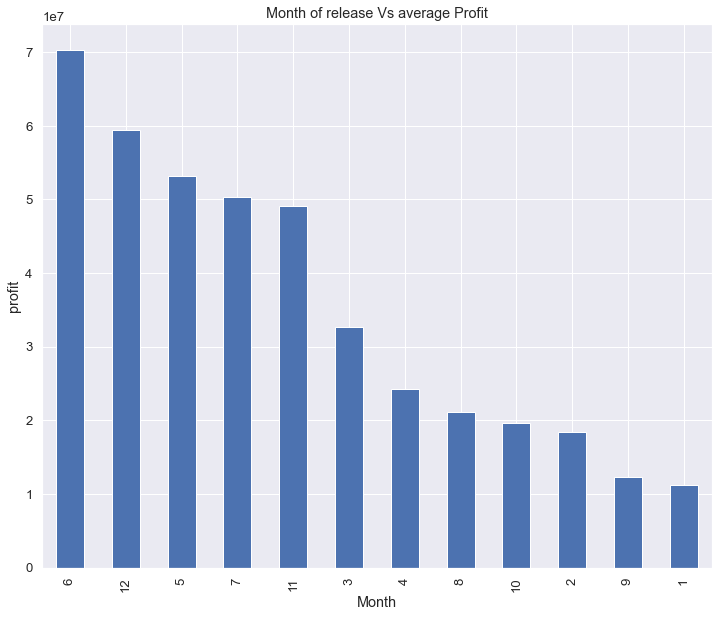

In [156]:
prof_month_avg.plot(kind="bar", title="Month of release Vs average Profit")
plt.xlabel("Month")
plt.ylabel("profit");

according to the averages, **June** is a best chance to release the movie to gain the best Profit

In [157]:
df.corr().profit

id              -0.108179
popularity       0.562838
budget           0.385535
revenue          0.802672
runtime          0.141947
vote_count       0.656885
vote_average     0.197501
release_year    -0.081103
budget_adj       0.408069
revenue_adj      0.922372
profit           1.000000
release_month    0.042968
Name: profit, dtype: float64

here we can see the correlation betwen the PROFIT and the other variables, it's noticed the strong relation between the profit and the revenue_adj, also there is a strong relation with the popularity and with the vote_count

### Q9: How to make the most popularity

#### 9.1. production company with movies of the highest average popularity

In [158]:
df.groupby(["production1","production2","production3","production4","production5"])['popularity'].mean().sort_values(ascending=False).head().reset_index()

,production1,production2,production3,production4,production5,popularity
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,32.985763
1,Paramount Pictures,Legendary Pictures,Warner Bros.,Syncopy,Lynda Obst Productions,24.949134
2,Thunder Road Pictures,Warner Bros.,87Eleven,DefyNite Films,MJW Films,11.422751
3,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films,9.335014
4,Regency Enterprises,Appian Way,CatchPlay,Anonymous Content,New Regency Pictures,9.110700


according to the averages:
> combination of **Universal Studios, Amblin Entertainment, legendary Pictures, Fuji Television Network and Denstu** is the best to get the highest Profits and also they are the best for the most popularity

#### 9.2. Cast contributed in the movies of the highest average popularity

In [159]:
df.groupby(['cast1','cast2', "cast3", "cast4", "cast5"])['popularity'].mean().sort_values(ascending=False).head().reset_index()


,cast1,cast2,cast3,cast4,cast5,popularity
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,32.985763
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,28.419936
2,Matthew McConaughey,Jessica Chastain,Anne Hathaway,Michael Caine,Casey Affleck,24.949134
3,Chris Pratt,Zoe Saldana,Dave Bautista,Vin Diesel,Bradley Cooper,14.311205
4,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,13.112507


we recommend a cast including **Chris Pratt, Bryce Dallas Howard, Irrfan Khan, Vincent D'Onofrio and Nick Robinson** to achieve the most popularity for the movie

#### 9.3. Genres of the movies of the highest average popularity

In [160]:
df.groupby(['genre1','genre2', "genre3", "genre4", "genre5"])['popularity'].mean().sort_values(ascending=False).head().reset_index()


,genre1,genre2,genre3,genre4,genre5,popularity
0,Action,Thriller,Science Fiction,Mystery,Adventure,9.363643
1,Adventure,Family,Animation,Action,Comedy,8.691294
2,Fantasy,Action,Adventure,Science Fiction,Thriller,5.806897
3,Science Fiction,Action,Adventure,Fantasy,Comedy,5.787396
4,Action,Family,Science Fiction,Adventure,Mystery,5.462138


**Action, Thriller, Science Fiction, Mystery, and Adventure**
according to the average values this combination of Genres would help to achieve the highest Popularity 

#### 9.4. Directors who directed the movies of the highest average popularity

In [161]:
df.groupby("director")["popularity"].mean().sort_values(ascending=False).head(10)


director
Colin Trevorrow                16.696886
Joe Russo|Anthony Russo        12.971027
Chad Stahelski|David Leitch    11.422751
Don Hall|Chris Williams         8.691294
Juno John Lee                   8.411577
Kyle Balda|Pierre Coffin        7.404165
Alan Taylor                     6.883129
Peter Richardson                6.668990
Pete Docter                     6.326804
Christopher Nolan               6.195521
Name: popularity, dtype: float64

as a director **Colin Trevorrow** seems to know how to make the most popular movies

In [162]:
df.corr().popularity

id              -0.014351
popularity       1.000000
budget           0.439930
revenue          0.570257
runtime          0.136838
vote_count       0.800828
vote_average     0.209517
release_year     0.089806
budget_adj       0.398943
revenue_adj      0.509042
profit           0.562838
release_month    0.043240
Name: popularity, dtype: float64

here we can see the correlation betwen the POPULARITY and the other variables, it's noticed the strong relation between the popularity with the vote_count, also there is a strong relation with the profit and with the revenue_adj

<a id='conclusions'></a>
## Conclusions

>we have 10865 movies, 
>
>Robert De Niro the most ACtor to be participated in 72 movies, 
>
>Woody Allen the most common director with 45 movies, 
>
>Universal Pictures comapny Produced 522 movies,
>
>Drama comes first with 4760 movies as  the most common Genre,
>
>2014 was the releasing year for 700 movies.,
>
>Septmeber was the releasing month for 1331 movies.

>Jurassic World is the most popular Movie.

>Avatar is the movie of the highest Revenues.

>Star Wars is the movie of the highest Profit.

>The Story of Film: Odyssey is the movie of the highest Voting 

>The Warrior's Way is the movie of the biggest budget

>by years we notice:
>
>run time have been decreased
>
>budgets increased and then increased until the starting of the 21st century 
>
>revenues also have been decreased
>
>Vote_average tends to decrease by years
>
>while popularity seems to be increasing 

>for the best Profits we recommend:
>combination of **Universal Studios, Amblin Entertainment, legendary Pictures, Fuji Television Network and Denstu** for production.
>
>the combination of genres **Crime, Drama, Mystery, Thriller, and Action** 
>
>cast including **Mark Hamill, Harrison Ford, Caarrie Fisher, Peter Cushing and Alec Guinnes**
>
>**Clyde Geronimi, Hamilton Luske, and Wolfgang Reitherman**  as directors
>
>according to the averages, **June** is a best chance to release the movie


>for the best Popularity, we recommend:
>
>combination of **Universal Studios, Amblin Entertainment, legendary Pictures, Fuji Television Network and Denstu**
>
>cast including **Chris Pratt, Bryce Dallas Howard, Irrfan Khan, Vincent D'Onofrio and Nick Robinson**
>
>**Action, Thriller, Science Fiction, Mystery, and Adventure**
according to the average values this combination of Genres would help
>
>as a director **Colin Trevorrow**
